## 🛠 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=5)

## 📊 2. Plot Configuration 

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
FIG_FONT = dict(family="Helvetica, Ariel", weight="bold", color="#7f7f7f")

## 🛒 3. Loading Dataset
Let's first check the dataset to get a first insight.

In [3]:
salaries = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv", index_col=0)
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


## 💡 4. Understanding the Data
Dataset consists of 11 features.
1. **work_year**: The year the salary was paid.
2. **experience_level**: The experience level in the job during the year.
    - EN (Entry-level) / Junior
    - MI (Mid-level) / Intermediate 
    - SE (Senior-level) / Expert
    - EX (Expert-level) / Director
3. **employment_type**: The type of employment for the role.
    - PT (Part-time)
    - FT (Full-time)
    - CT (Contact)
    - FL (Freelance)
4. **job_title**: The role worked during the year.
5. **salary**: The total gross salary amount paid.
6. **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
    - USD (United States Dollar)
    - EUR (Euro)
    - GBP (Great Britain Pound)
    - ...
7. **salary_in_usd**: The salary in USD(United States Dollars).
8. **employee_residence**: Employee's primary country of residence in during the work year as ISO 3166 country code.
    - DE (Germany)
    - JP (Japan)
    - GB (Great Britain)
    - ...
9. **remote_ratio**: The overall amount of work done remotely.
    - 0 (No remote)
    - 50 (Partially remote)
    - 100 (Fully remote)
10. **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
    - DE (Germany)
    - JP (Japan)
    - GB (Great Britain)
    - ...
11. **company_size**: The average number of people that worked for the company during the year.
    - S (Small) (< 50)
    - M (Medium) (50 < & > 250)
    - L (Large) (> 250)

I will try to analyze the salaries only in **USD**. Therefore, I will remove the **salary_currency** and **salary** columns. Also change the name of the **salary_in_usd** column to just **salary**.

In [5]:
salaries.drop(labels=["salary", "salary_currency"], axis=1, inplace=True)
salaries.rename(columns={"salary_in_usd": "salary"}, inplace=True)

In [6]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### 4.1 Checking Null Values
First let's check the dataset if it contains any null values.

In [7]:
salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no null values in the dataset therefore, we can proceed to exploratory data analysis without any extra steps.

## 🔎 5. Exploratory Data Analysis

### 5.1 Univariate Analysis
We will analyze features individually. 
* For the `category` type features, we will use **bar plot** and **pie chart**. 
* For the `numerical` type features, we will use **box plot** and **histogram**.

In [8]:
## Helper Functions

def univariate_multi_plot(df=salaries, x=None, xlabel=None, title=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0])
    df[x].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()
    
    
def univariate_single_plot(df=salaries, x=None, xlabel=None, title=None):
    plt.figure(figsize=(20, 7))
    sns.countplot(data=df, x=x)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14, fontdict=FIG_FONT)
    plt.xticks(rotation=90)
    plt.ylabel(ylabel="")
    plt.title(label=f'{xlabel} Distribution', size=18, fontdict=FIG_FONT)
    plt.show()
    
    
def univariate_numerical_plot(df=salaries, x=None, xlabel=None, title=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharex=True)
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[1].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()

#### 5.1.1 Work Year

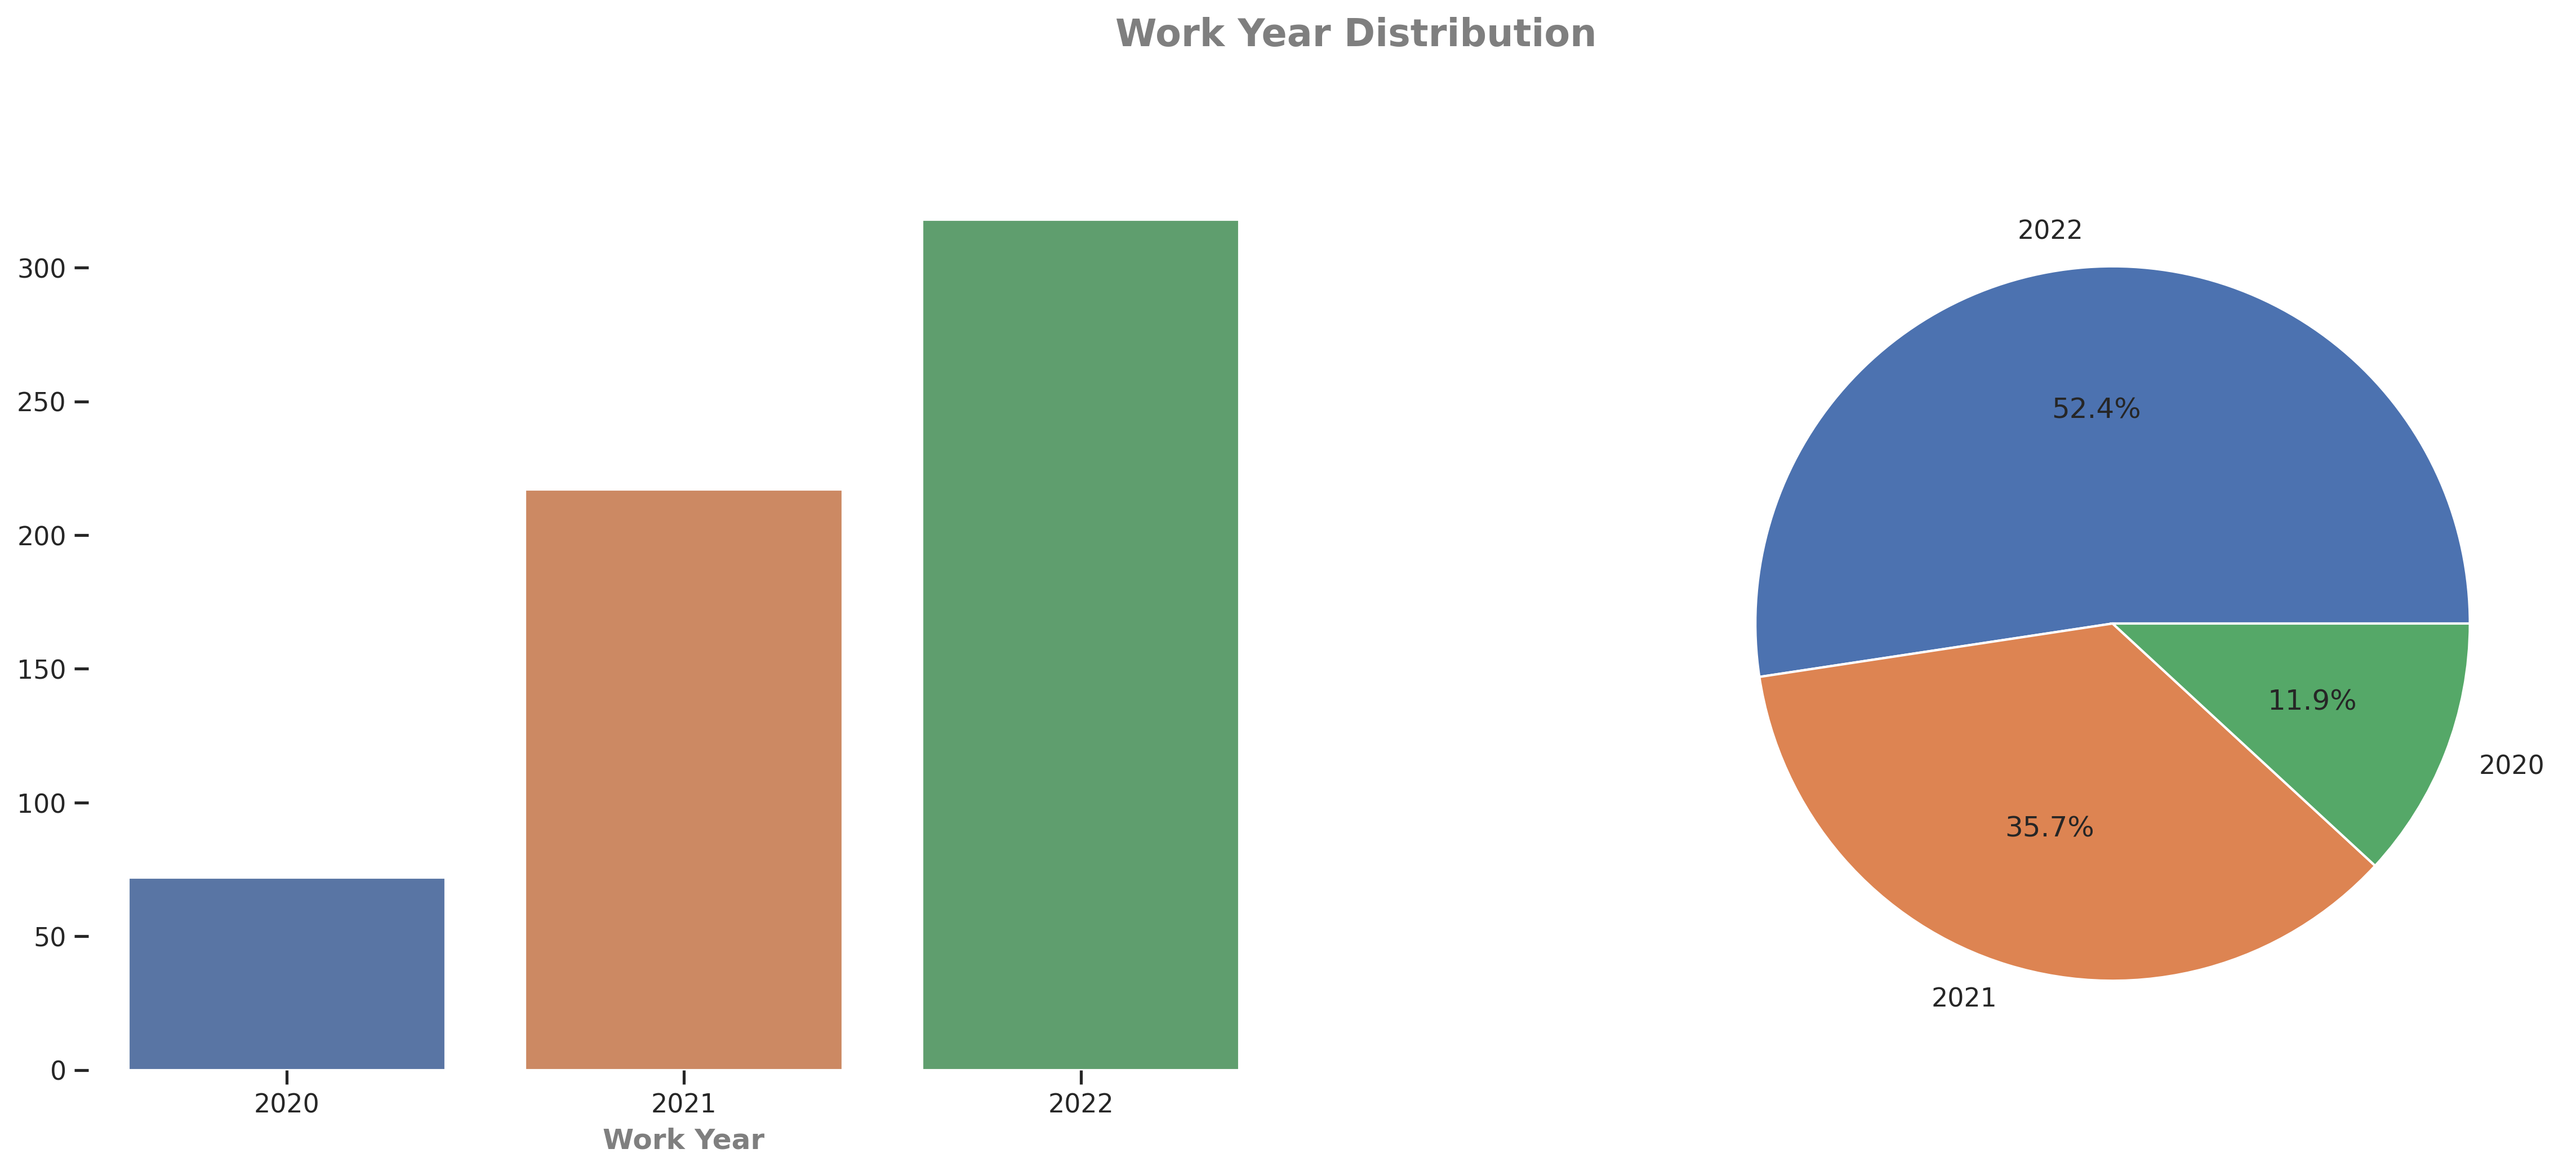

In [9]:
univariate_multi_plot(x="work_year", xlabel="Work Year")

* More than half of the salary data are from **2022**. 
* Almost 1/3 of the the data are from **2021**
* Rest of the data are from **2020** with approximately **11.9%** share.


* **Possible Conclusion**: Number of data science jobs are increasing over the years.

#### 5.1.2 Experience Level

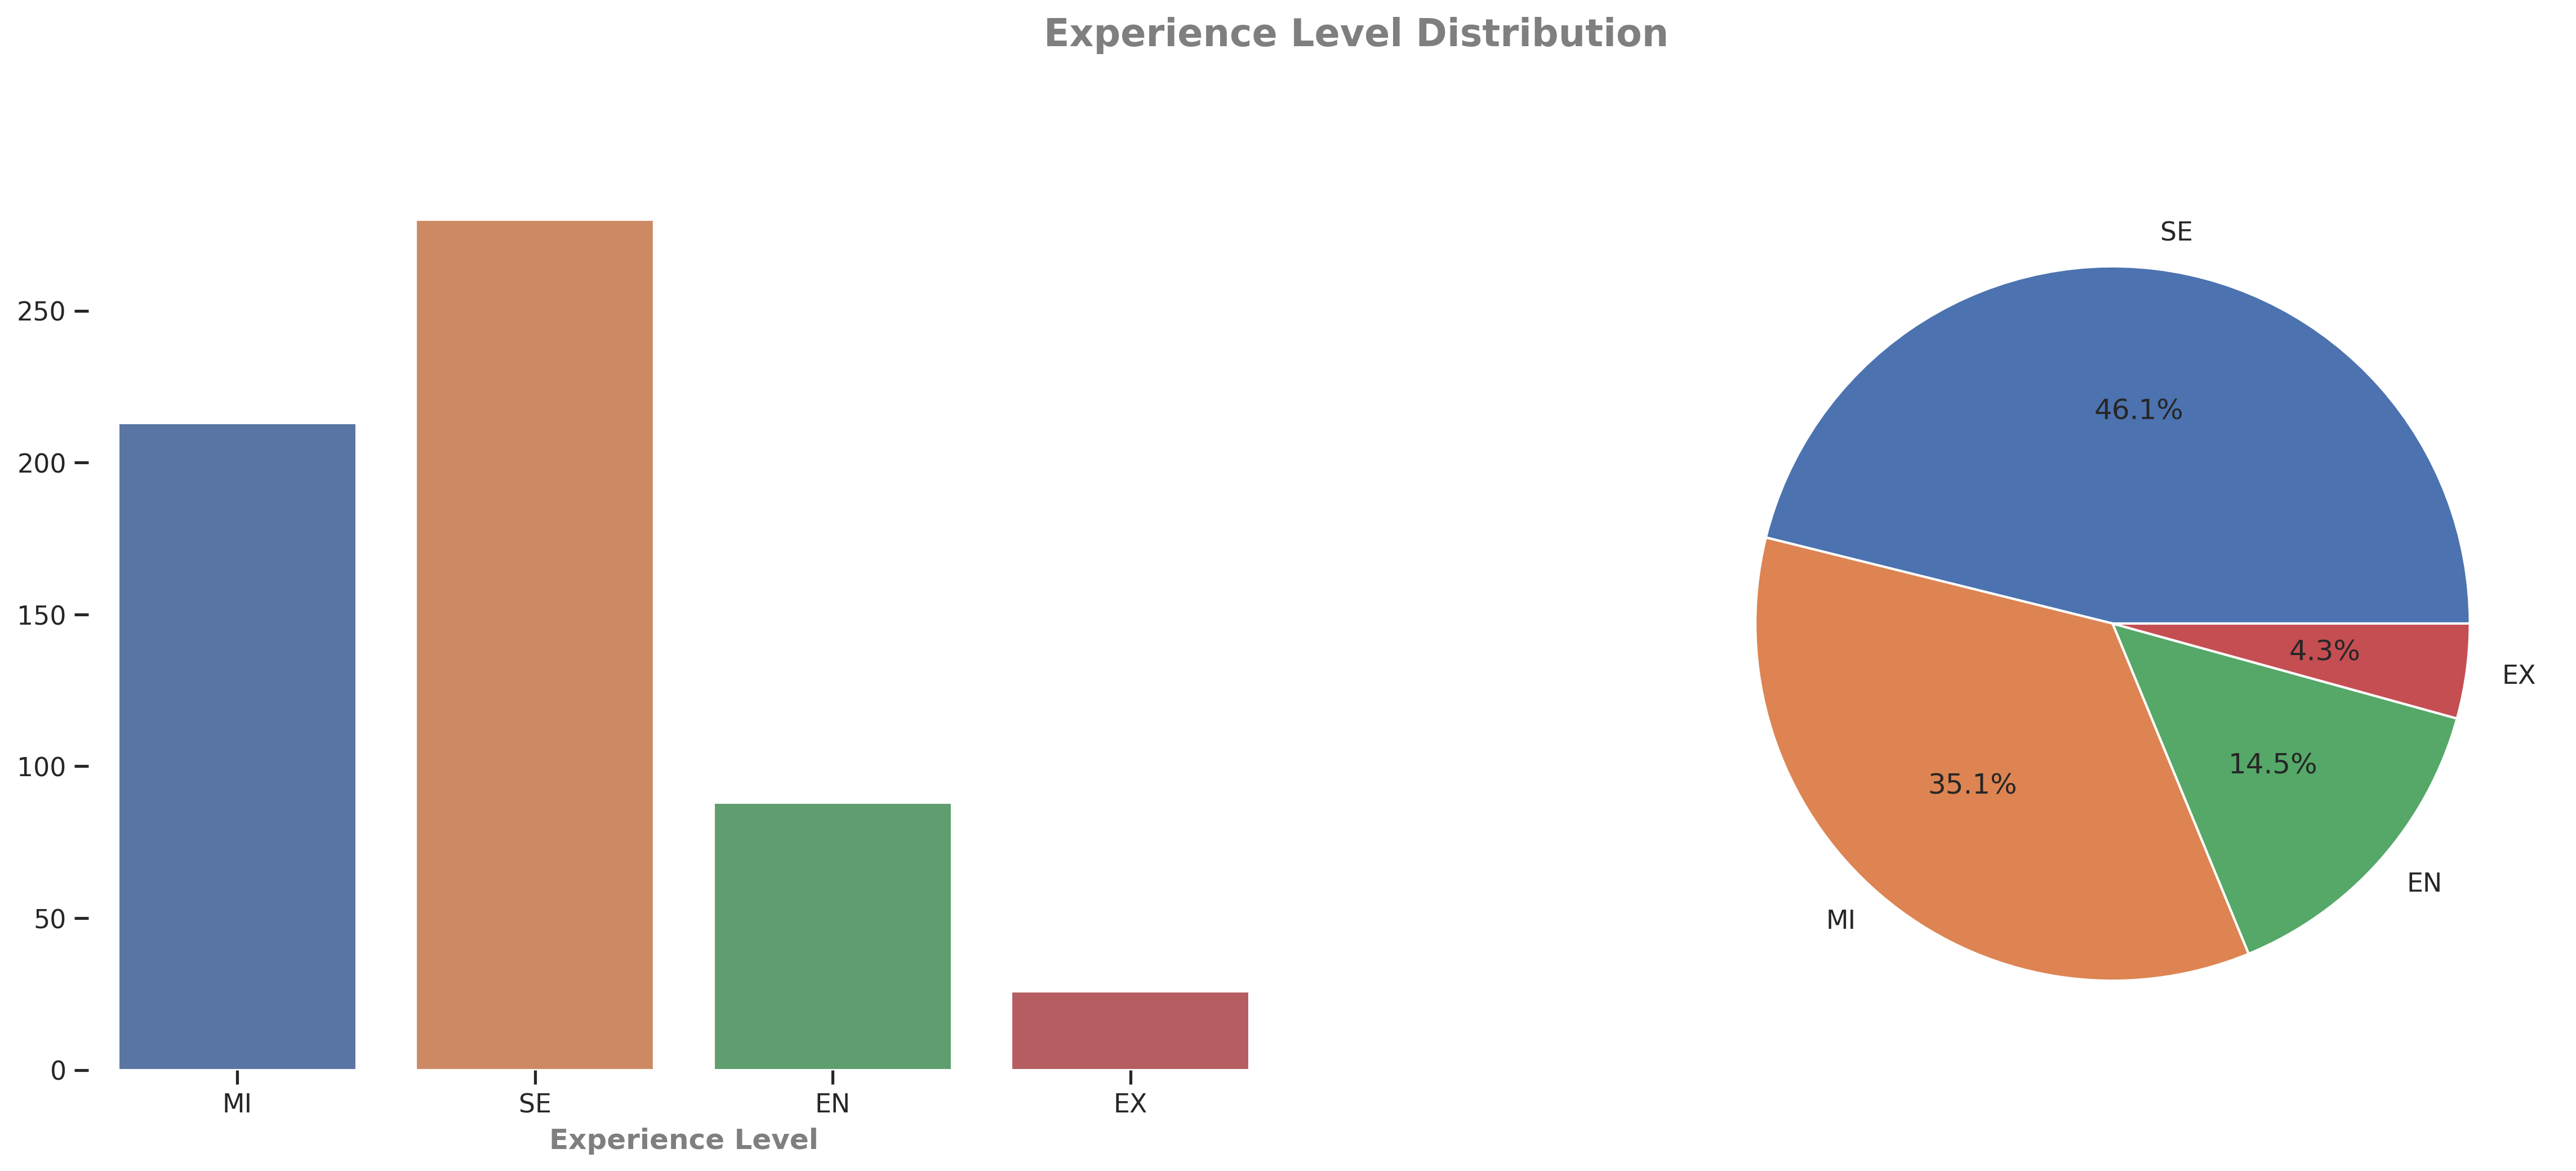

In [10]:
univariate_multi_plot(x="experience_level", xlabel="Experience Level")

* Number of **senior-level** employees are highest in the dataset. 
* Also, the number of **mid-level** employees are quite close to **senior-level**. 
* Meanwhile, number of **junior-level** and **expert-level** employees are relatively low. 

#### 5.1.3 Employment Type

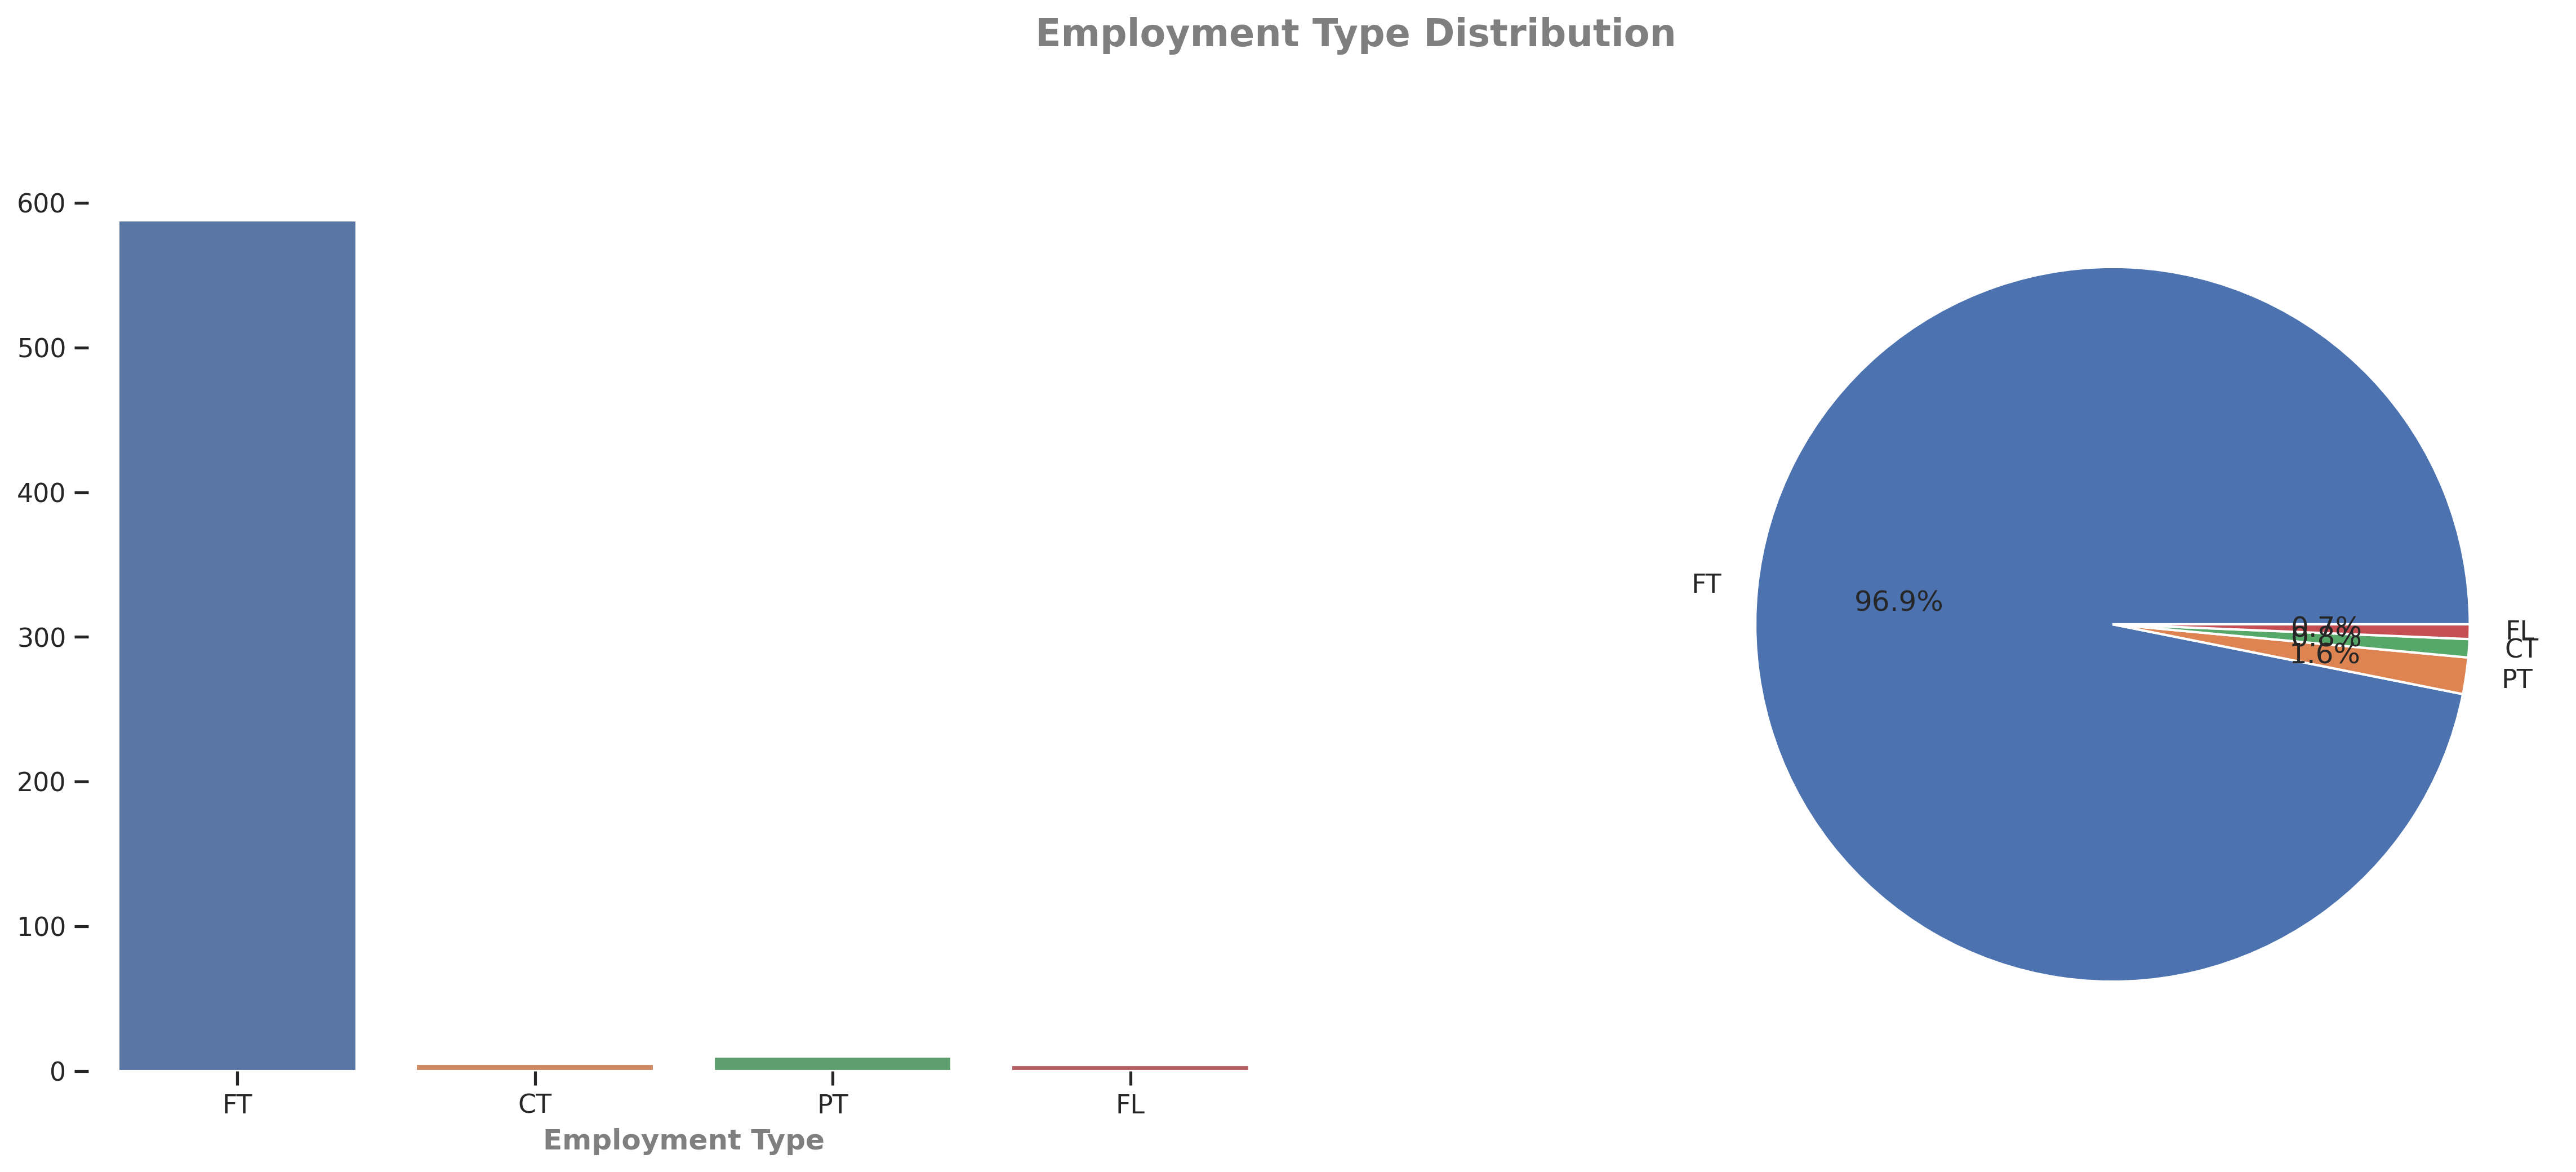

In [11]:
univariate_multi_plot(x="employment_type", xlabel="Employment Type")

* Number of **full-time** employees are significantly higher than the others. Approximately **96.9%** of the whole dataset.
* Number of **part-time** employees are very low. 
* Meanwhile, the number of **contract** and **freelance** employees are almost next to zero.


* **Possible Conclusion**: Almost all of the data science jobs requires you to be a full-time employee.

#### 5.1.4 Job Title

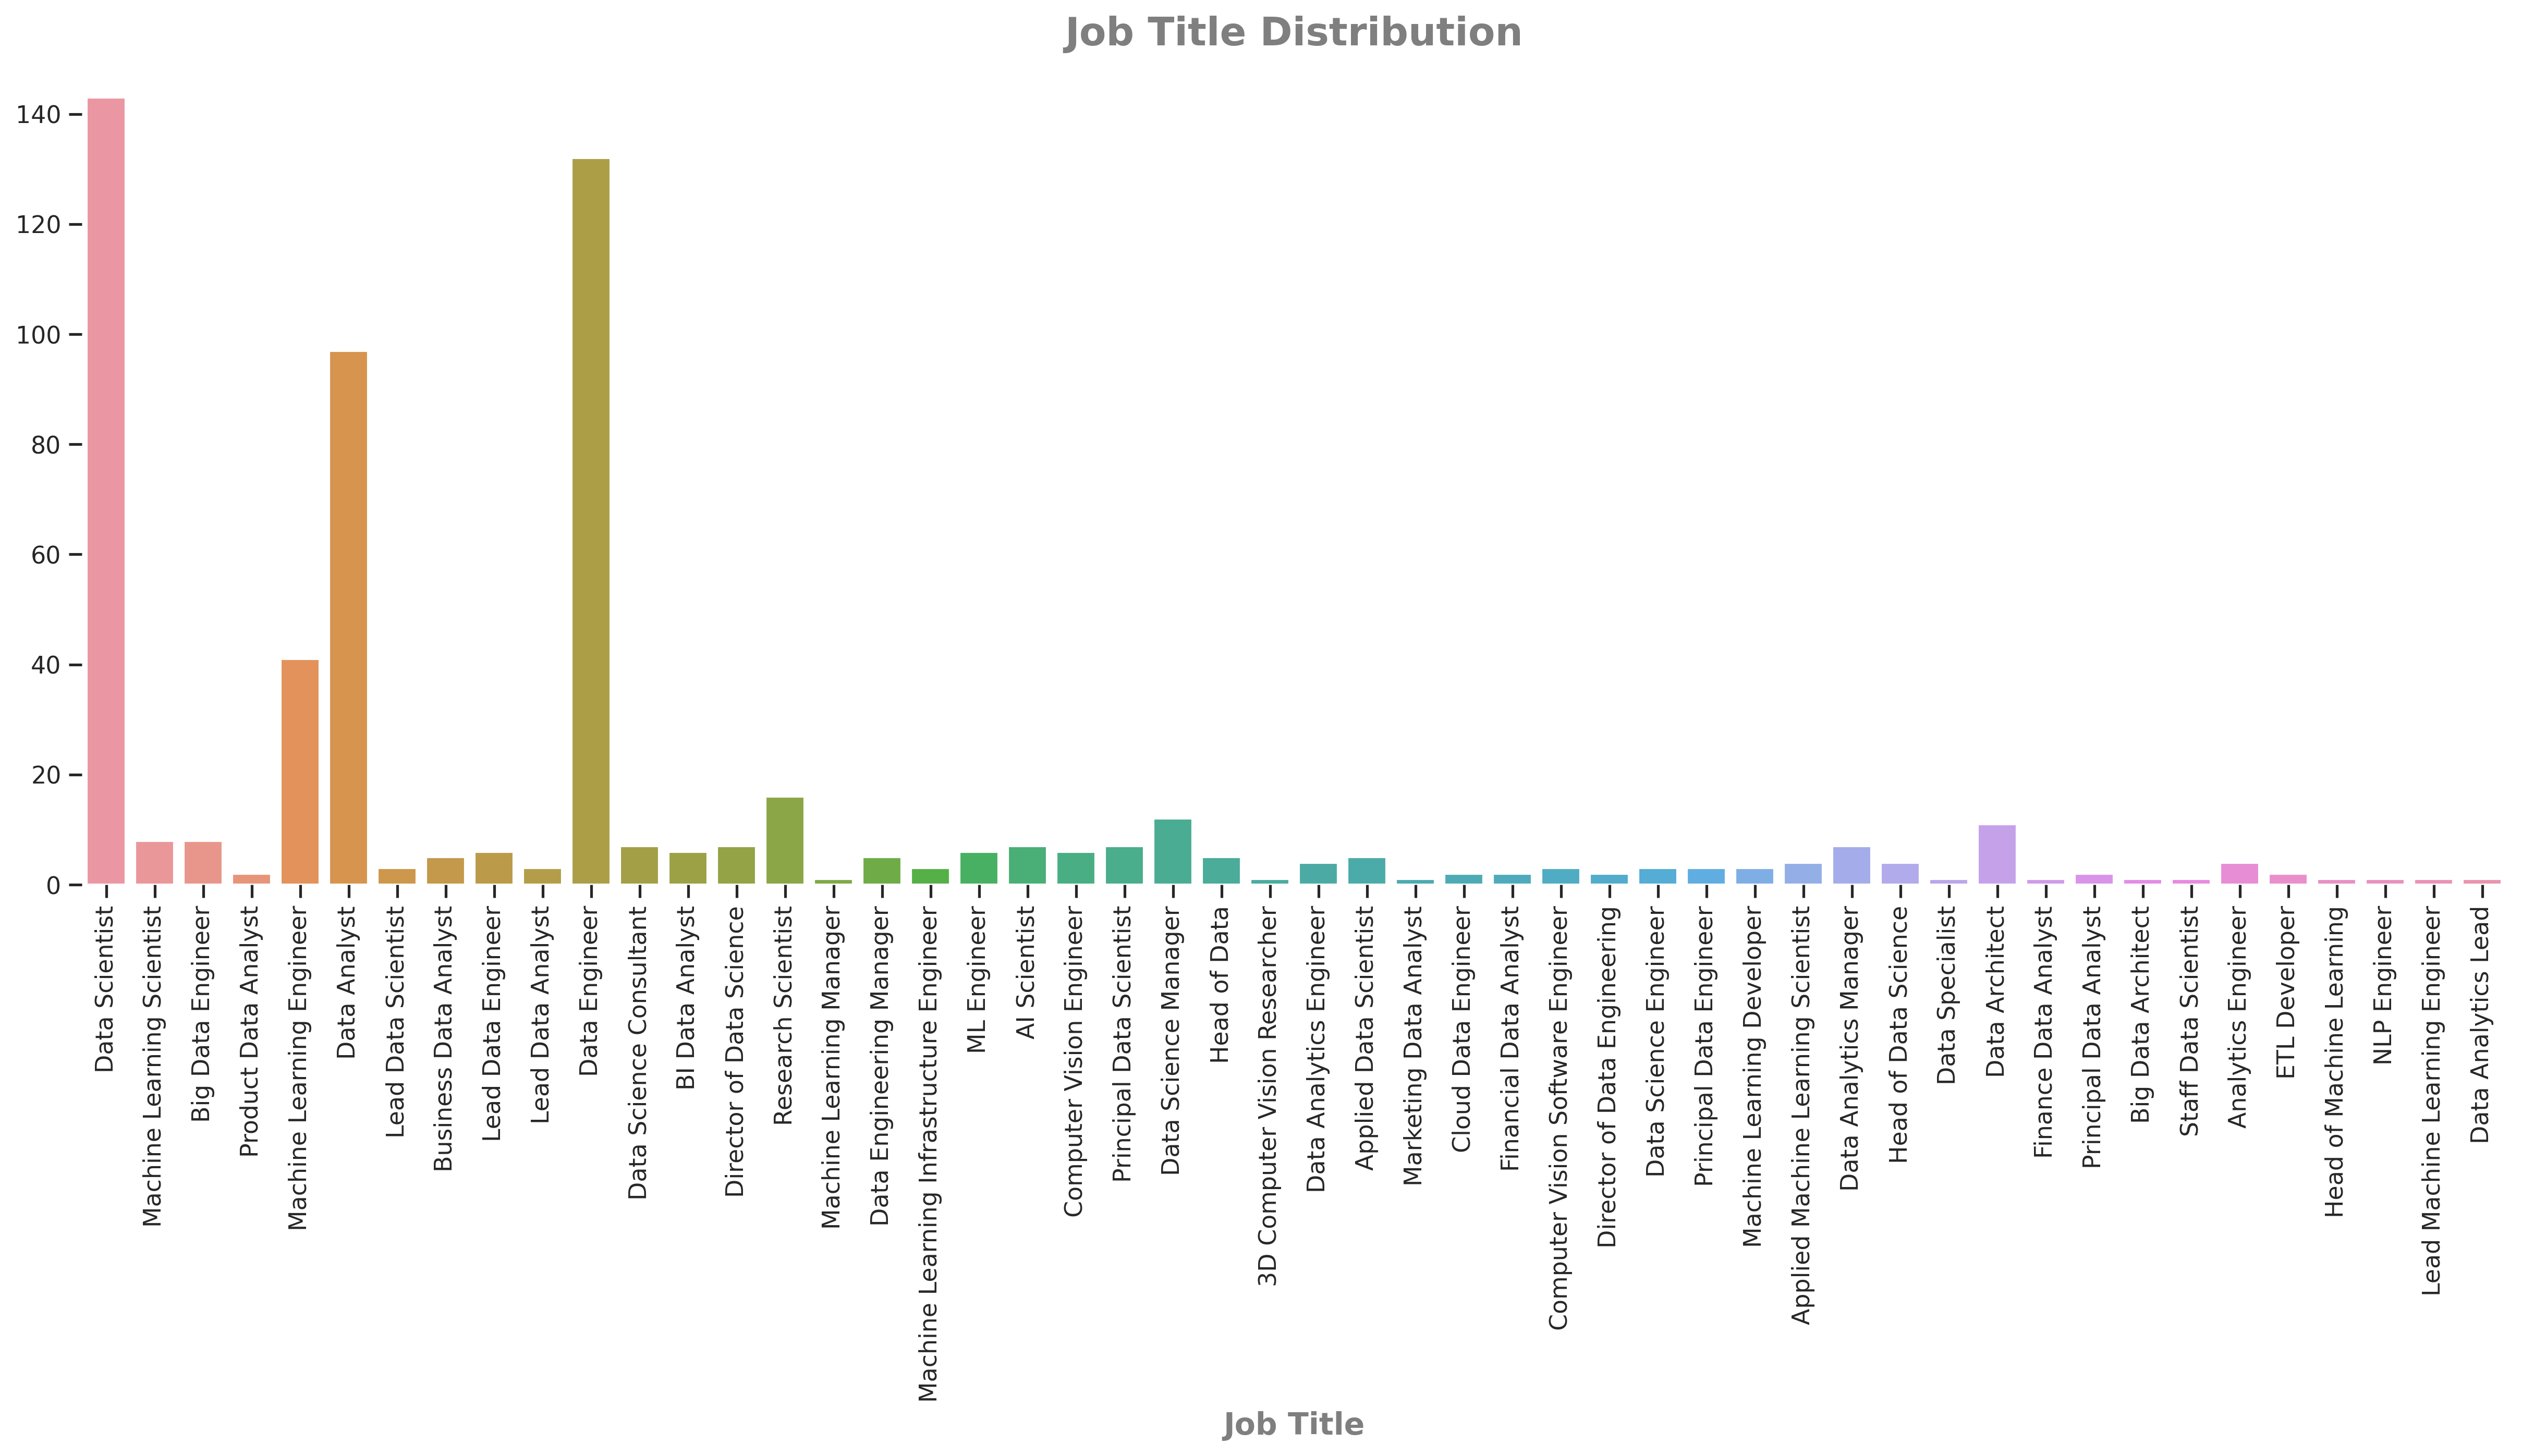

In [12]:
univariate_single_plot(x="job_title", xlabel="Job Title")

* Number of **Data Scientist** and **Data Engineer** salary data are highest in the dataset.
* **Data Analyst** takes the third place.
* **Machine Learning Engineer** is the last significant title with approximately 40 entry.


* **Possible Conclusion**: Job market is mostly dominated by Data Scientists, Data Engineers, Data Analysts, and Machine Learning Engineers.

#### 5.1.5 Salary

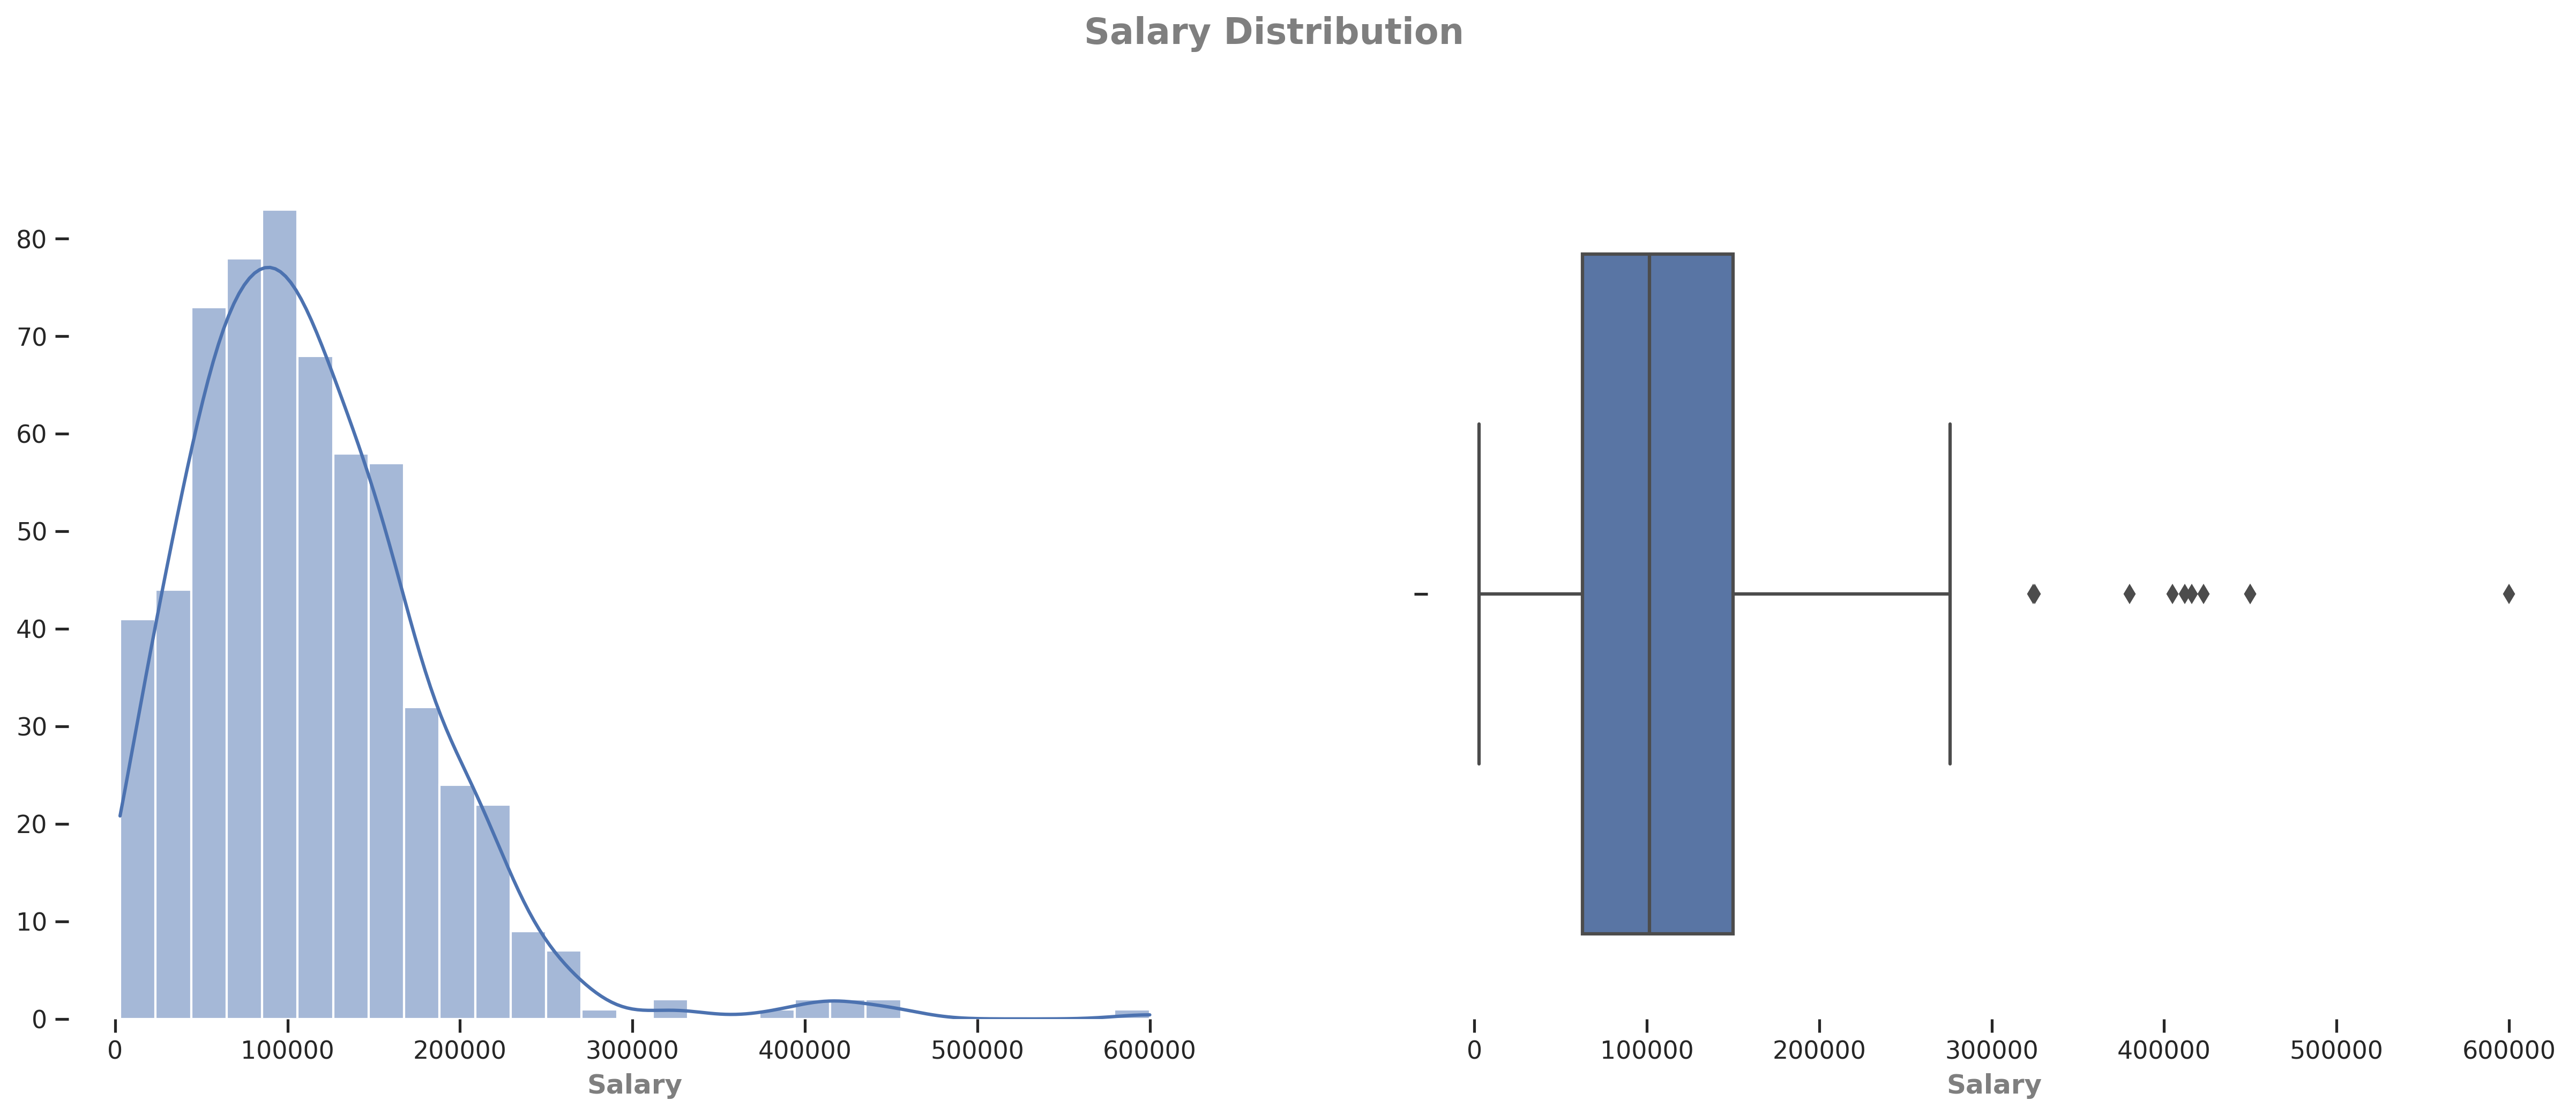

In [13]:
univariate_numerical_plot(x="salary", xlabel="Salary")

* By looking at the curve, we can say that the most of the employees are getting paid around **100,000** USD. 
* Higher salaries are quite rare, especially over **300,000 USD**.


* **Possible Outcome**: If we get a data science job right now, we will most likely be paid around **100,000** USD.

#### 5.1.6 Employee Residence

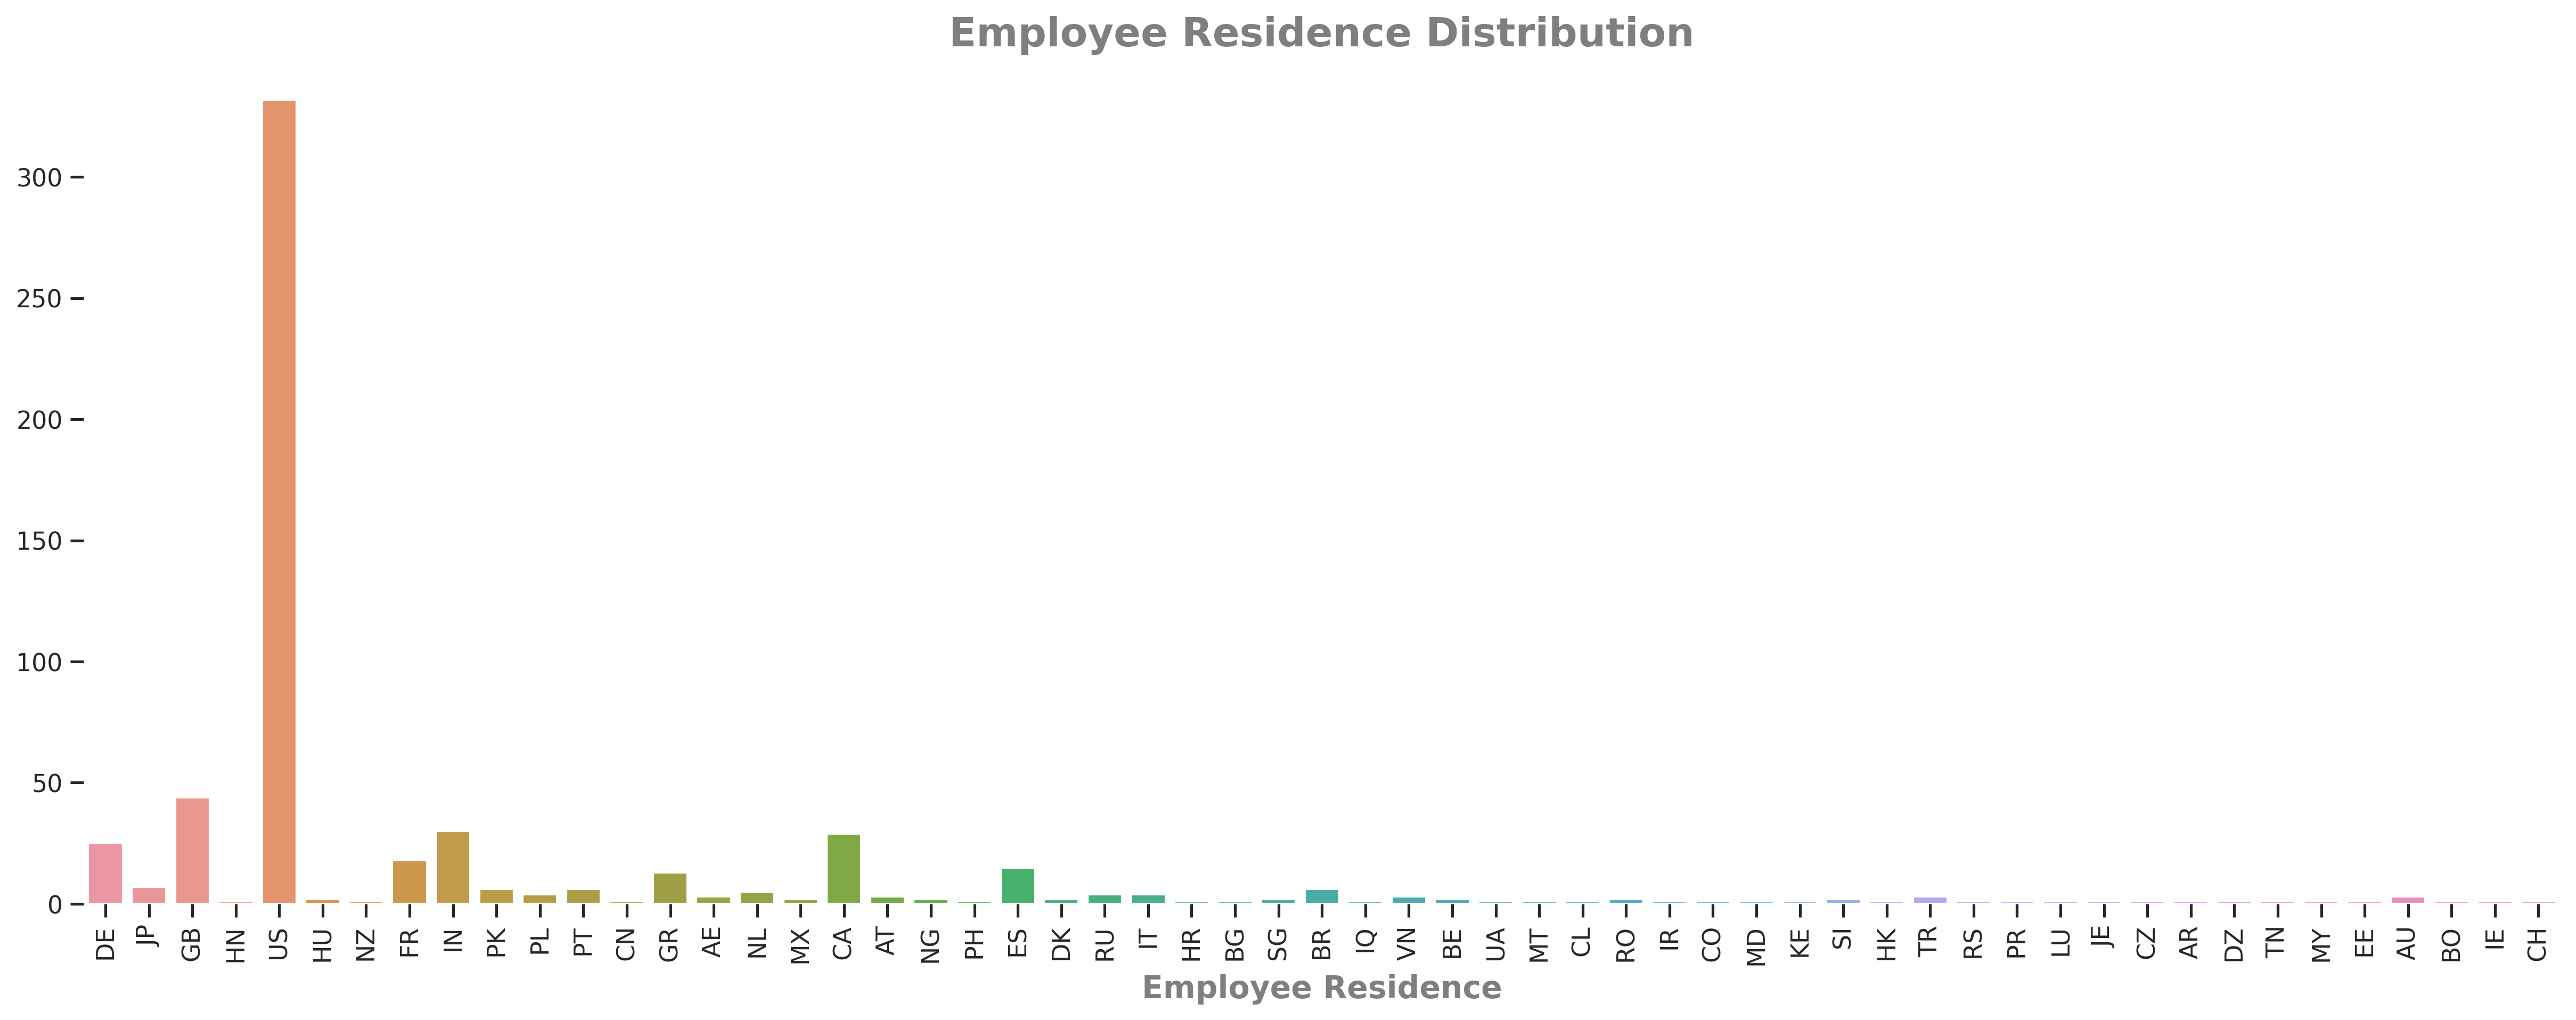

In [14]:
univariate_single_plot(x="employee_residence", xlabel="Employee Residence")

* The **United States** clearly dominates the competition with over **300** data entries.
* **Great Britain**, **Canada**, **India**, and **Germany** follows the **United States**, with less than **50** entries.
* Most of the countries are next to zero.


* **Possible Conclusion**: Data science jobs are much more popular and common in the United States than any other country.


#### 5.1.7 Remote Ratio

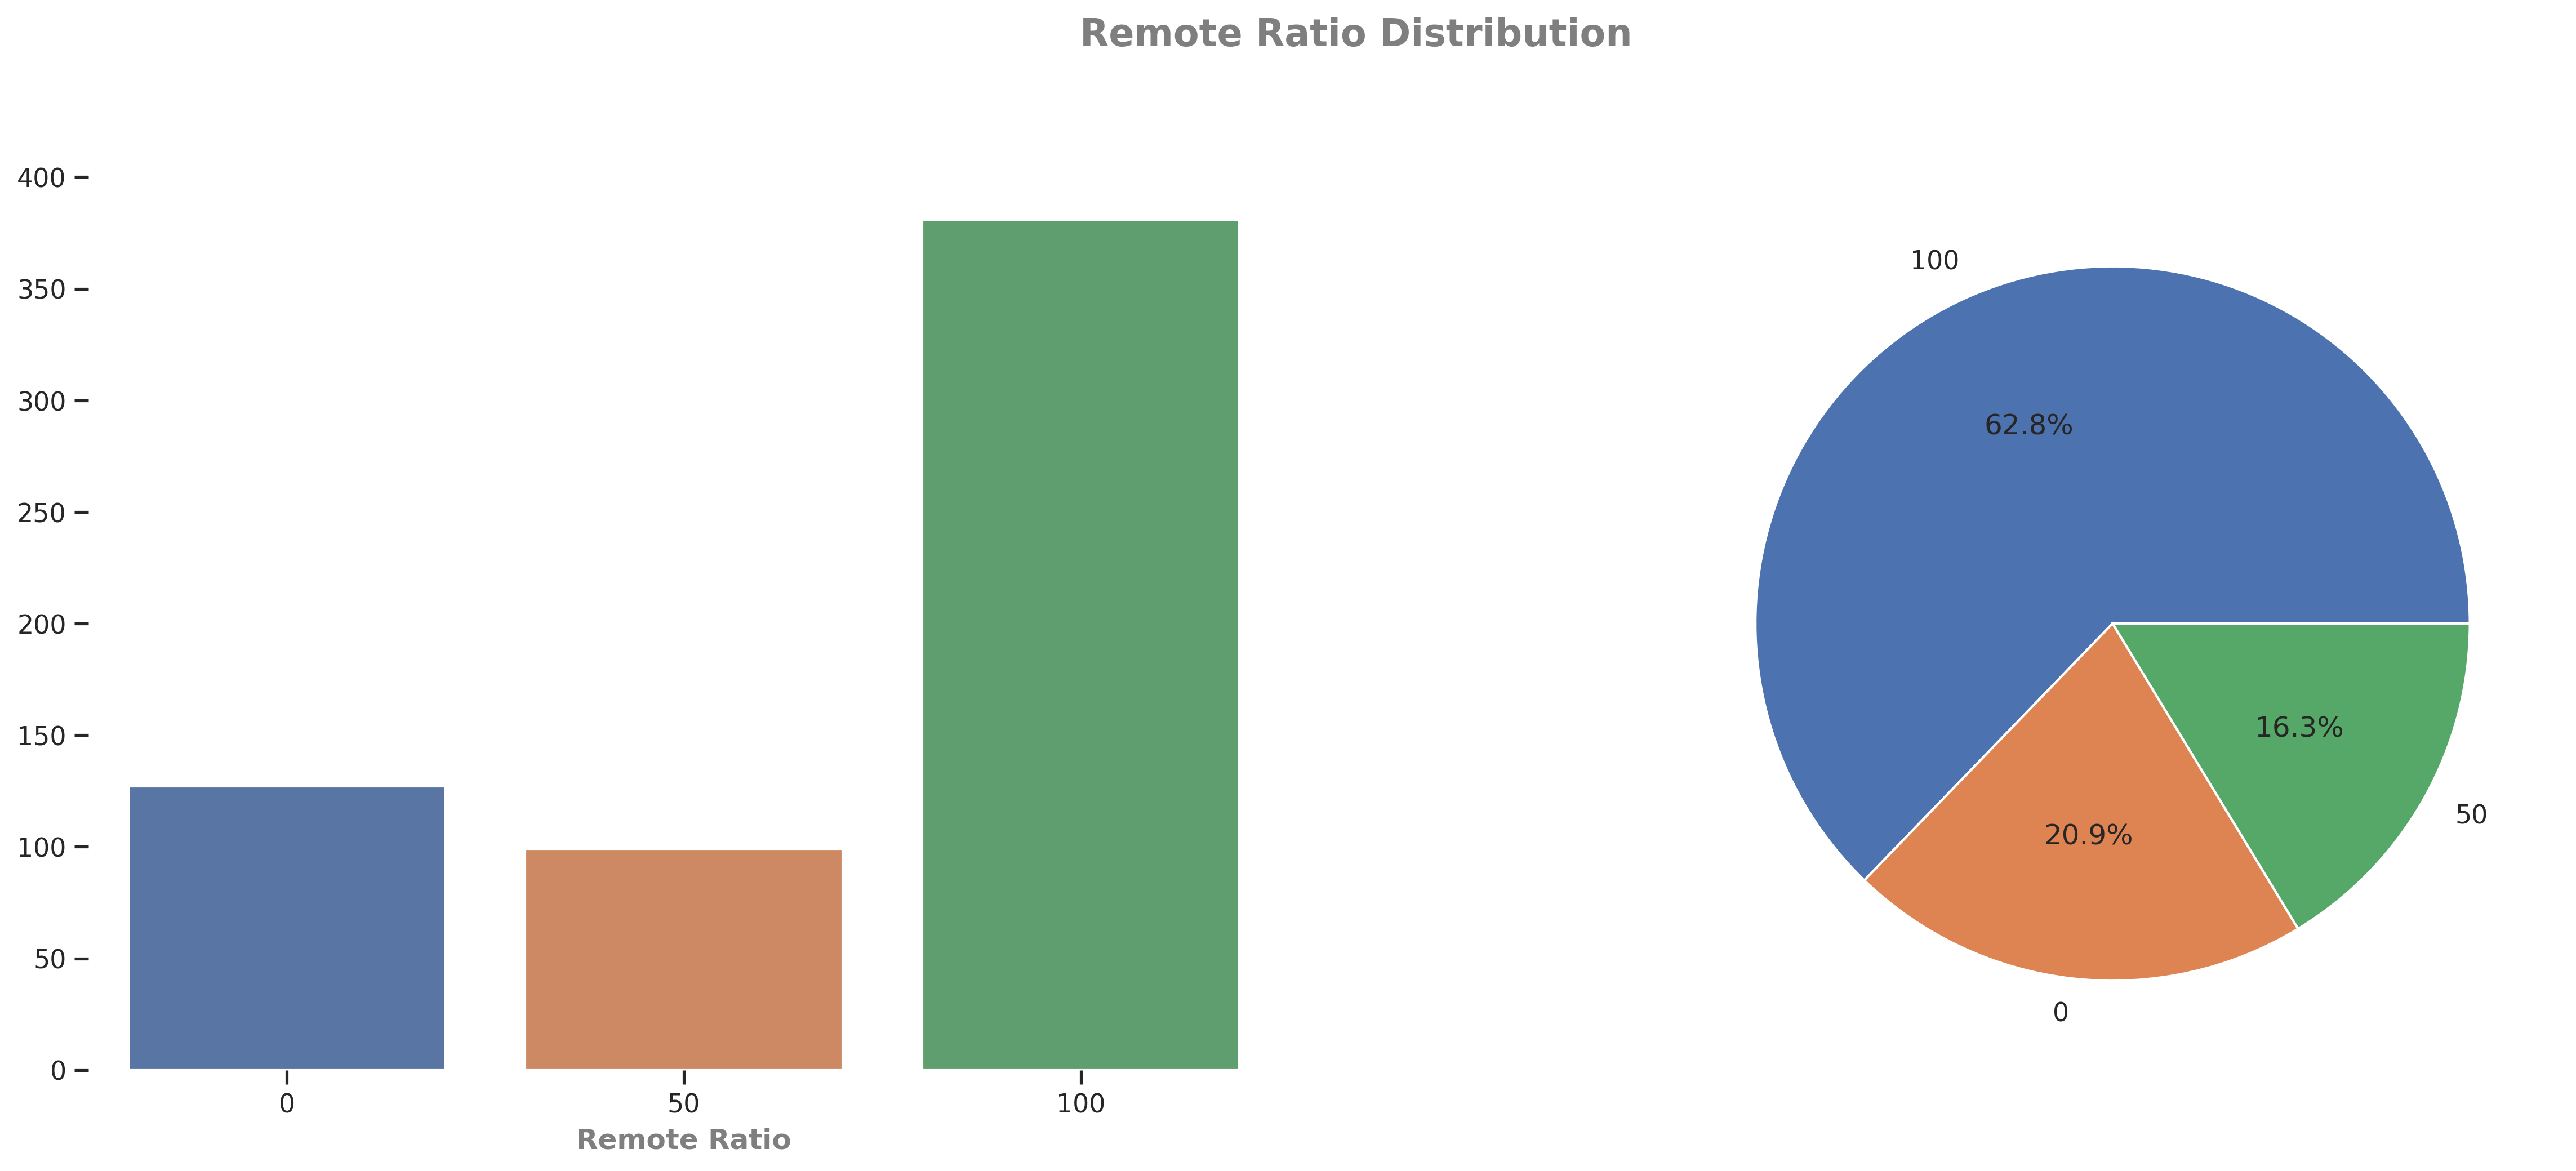

In [15]:
univariate_multi_plot(x="remote_ratio", xlabel="Remote Ratio")

* **Full-remote** work is more popular by far with approximately **62.8%** share.
* **Partially-remote(Hybrid)** and **non-remote** jobs are almost have the same popularity.


* **Possible Conclusion**: This result may be due to the covid pandemic. It is known that the remote jobs are increasing because of the pandemic.
* Later on, I will analyze the **remote work ratio** and **work year** at the same time to see if there is a correlation as I suspected.

#### 5.1.8 Company Location

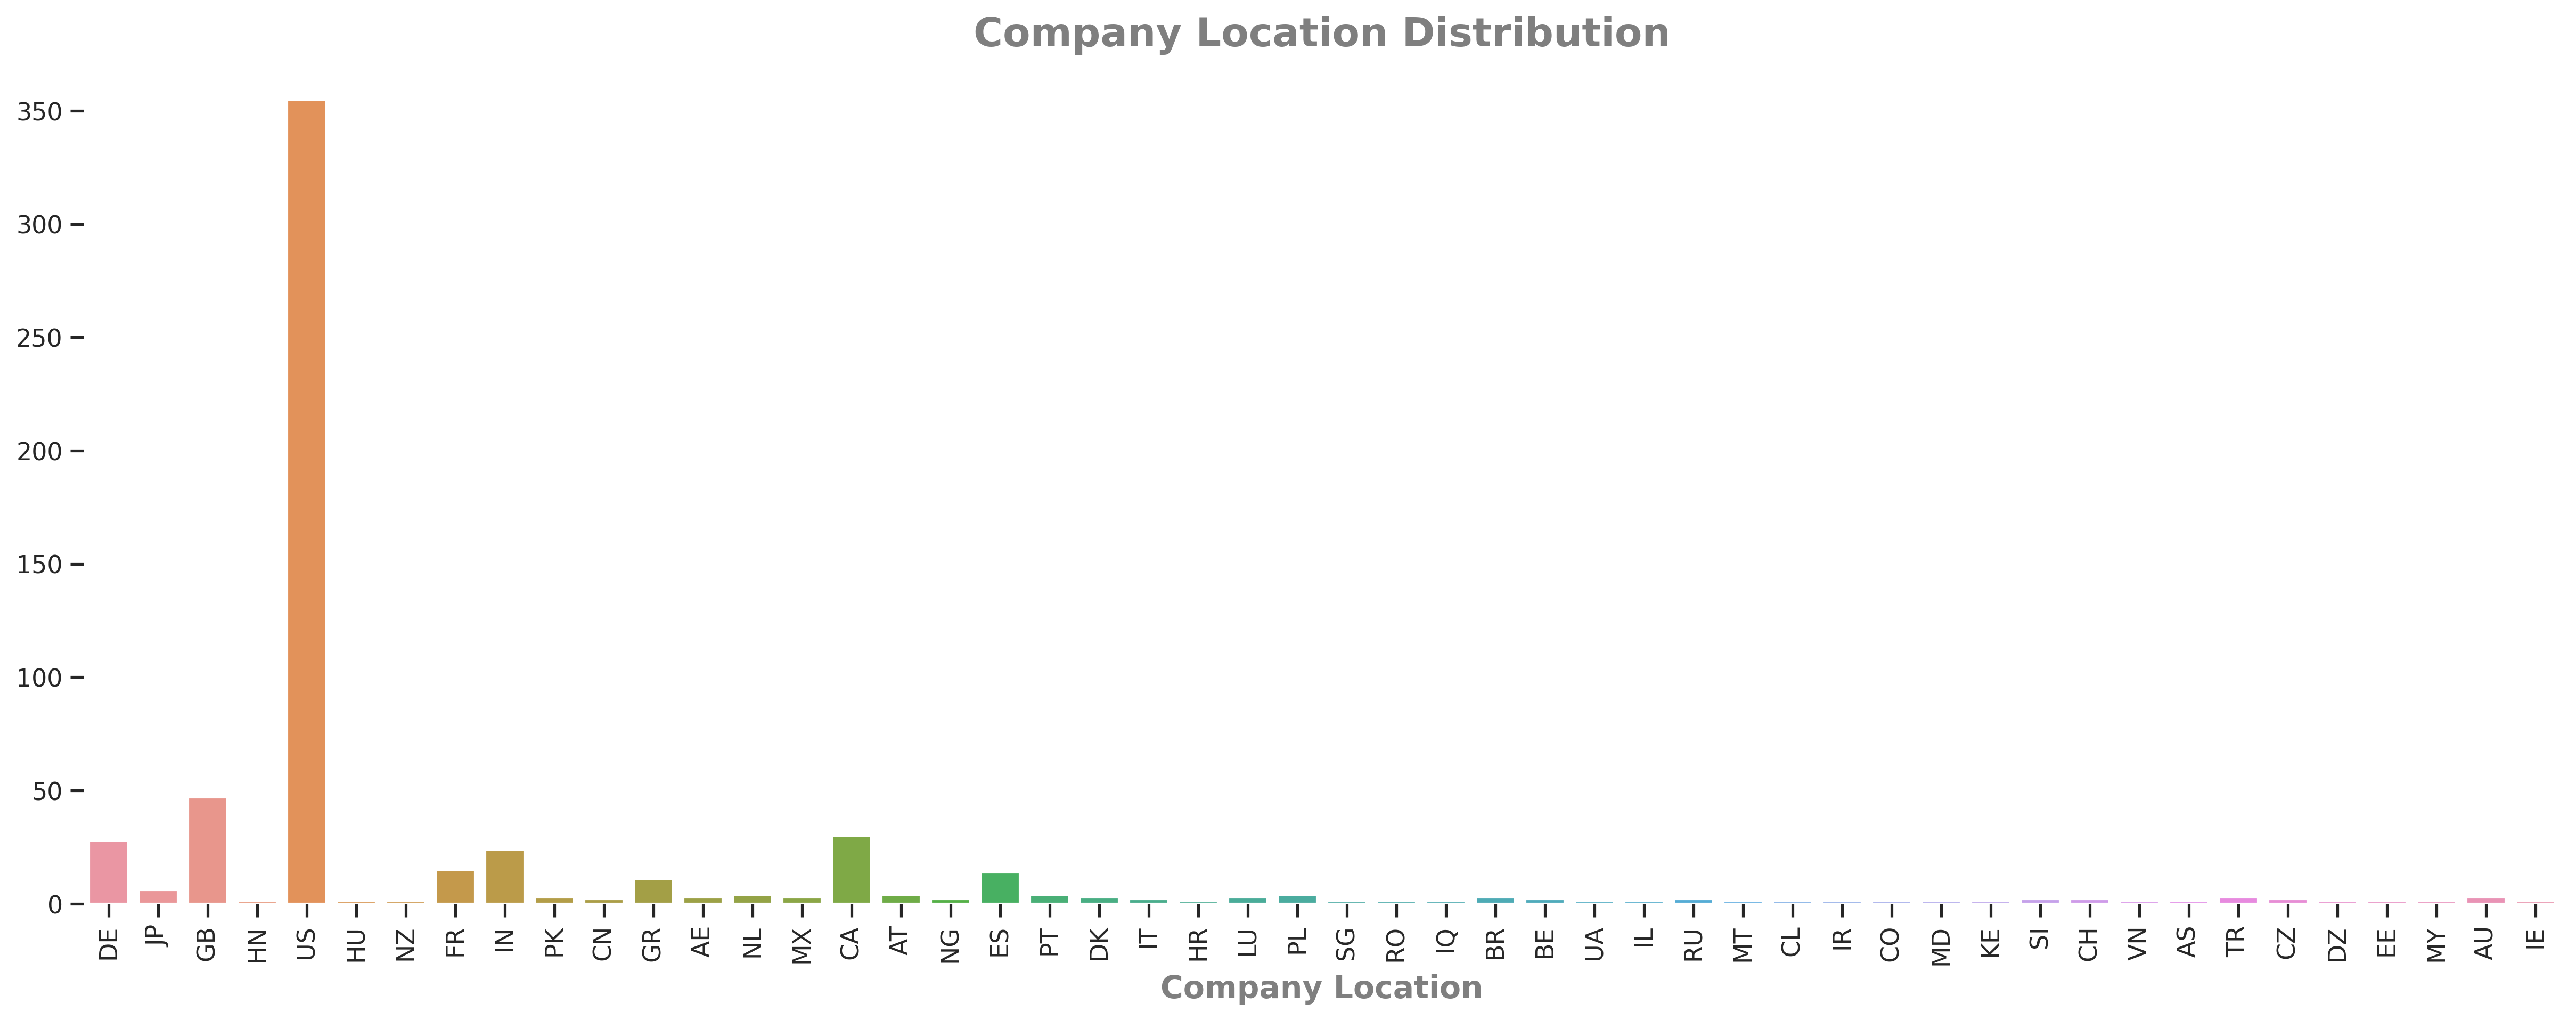

In [16]:
univariate_single_plot(x="company_location", xlabel="Company Location")

* The result is extremely similar to **employee residence** distribution.
* The **United States** dominates every other country by far.
* **Great Britain**, **Canada**, **India**, and **Germany** are following the **United States**.


* **Possible Conclusion**: Similar to employee residence analysis, most of the employers(companies) are **US** based.

#### 5.1.9 Company Size

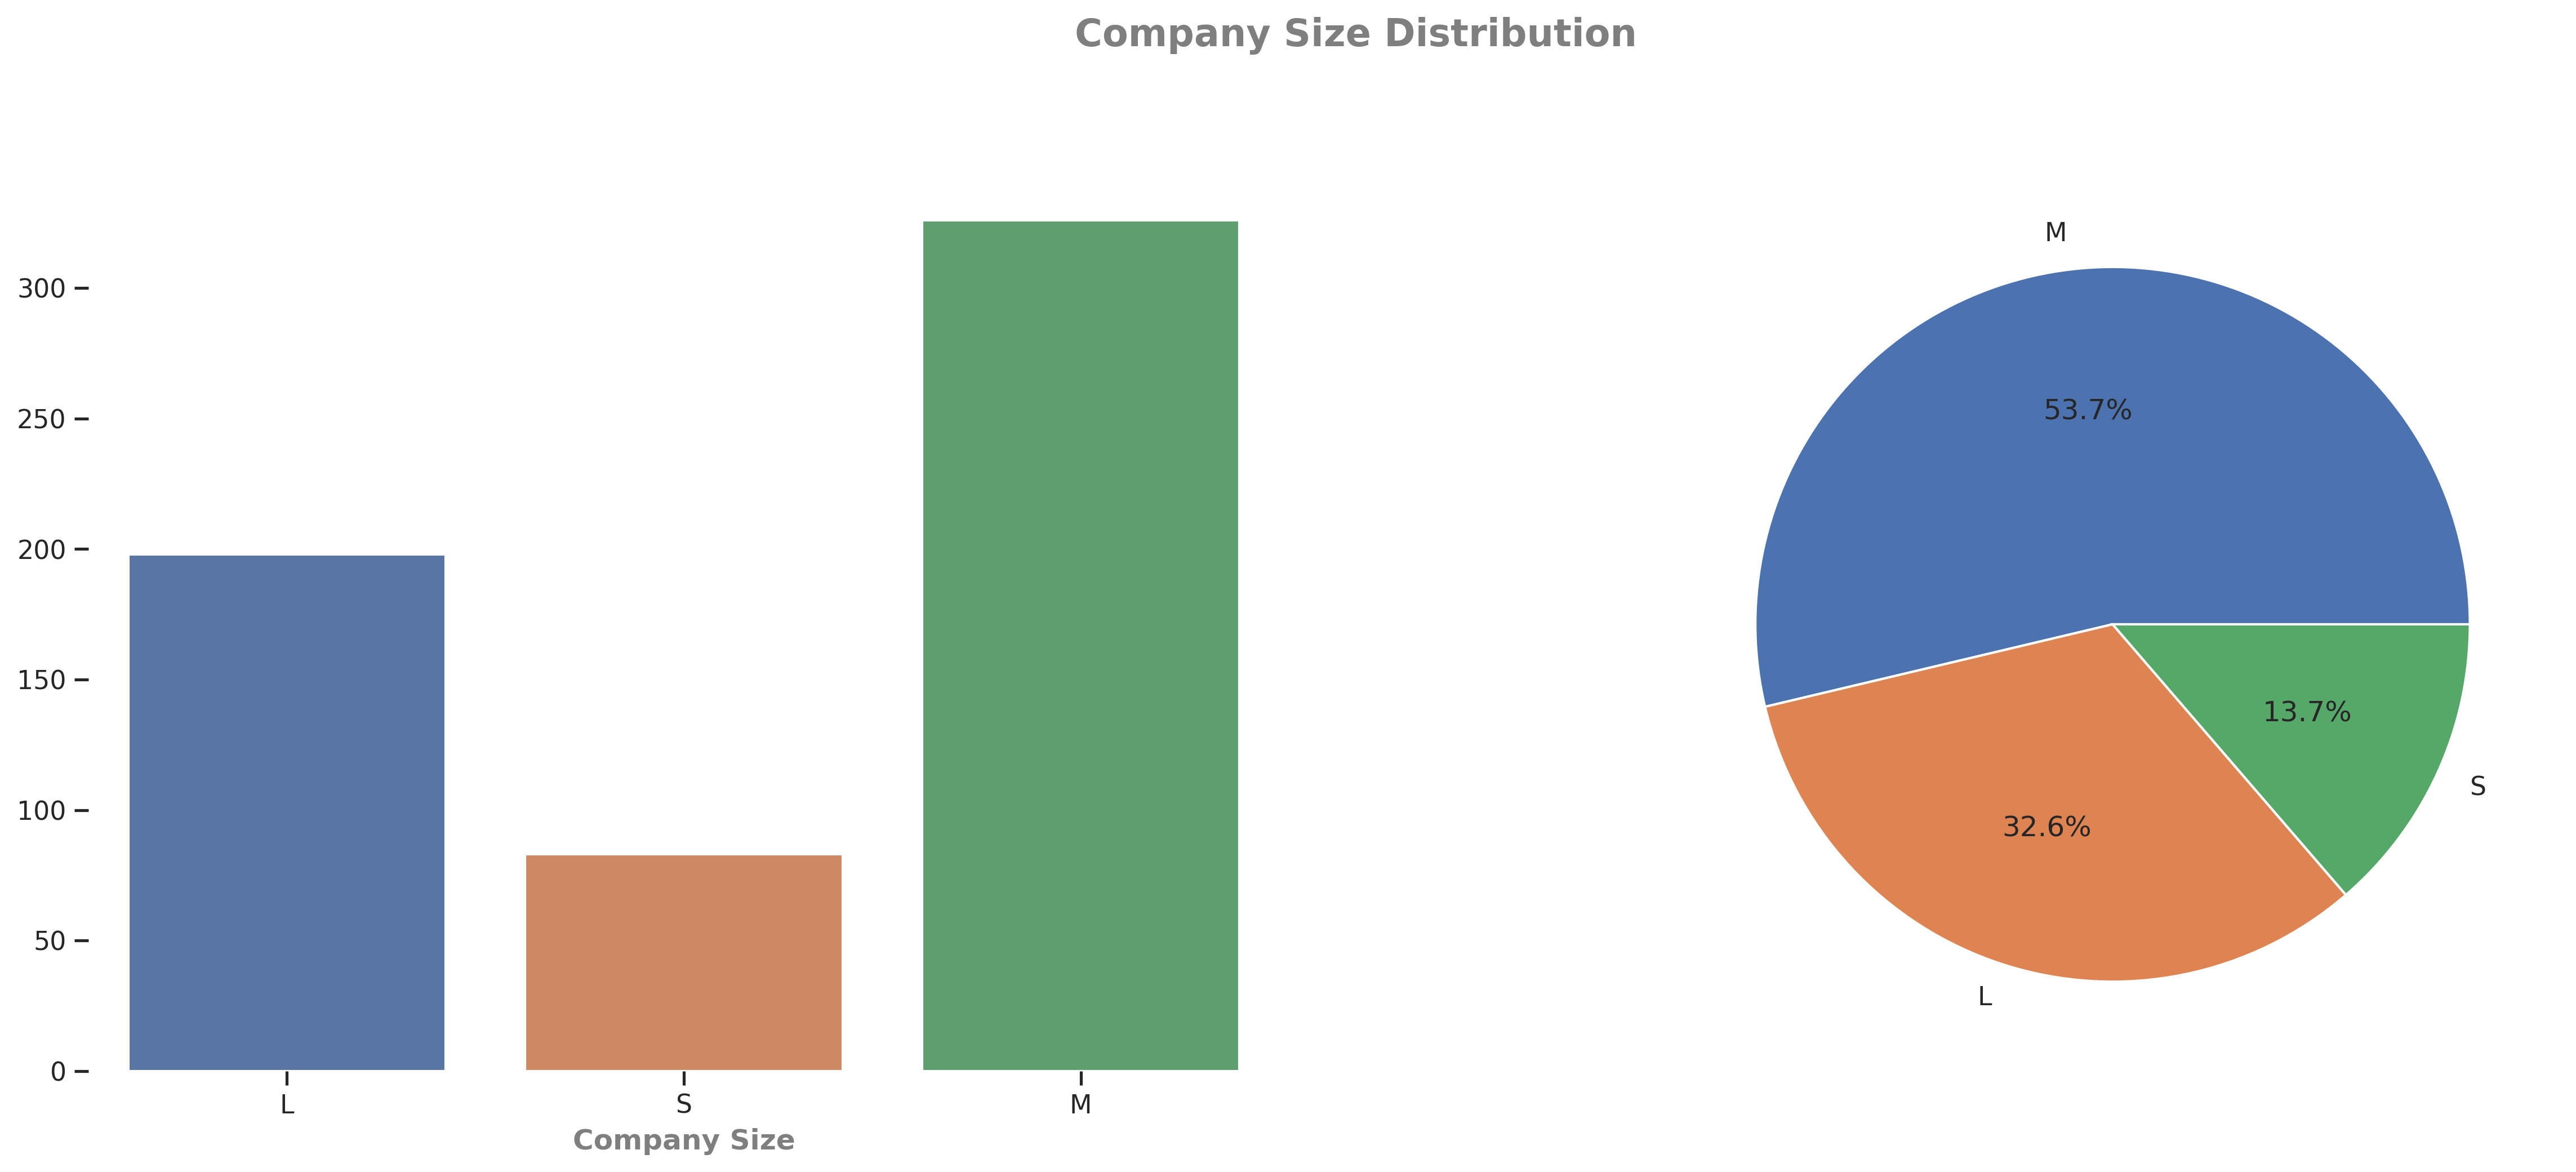

In [17]:
univariate_multi_plot(x="company_size", xlabel="Company Size")

* **Medium size** companies takes the lead with approximately **53.7%** share.
* Almost 1/3 of the data science jobs are posted by **Large size** companies.


* **Possible Conclusion**: I assume that, in general, the number of **large size** companies are less than **medium size** companies. The difference in result between **medium size** and **large size** companies may be due to this reason. Meanwhile, **small size** companies may not require a data scientist or any data science related employee.

### 5.2 Multivariate Analysis
Now, we will try to analyze features together to understand the relations between them.

#### 5.2.1 Analysis of Experience Level

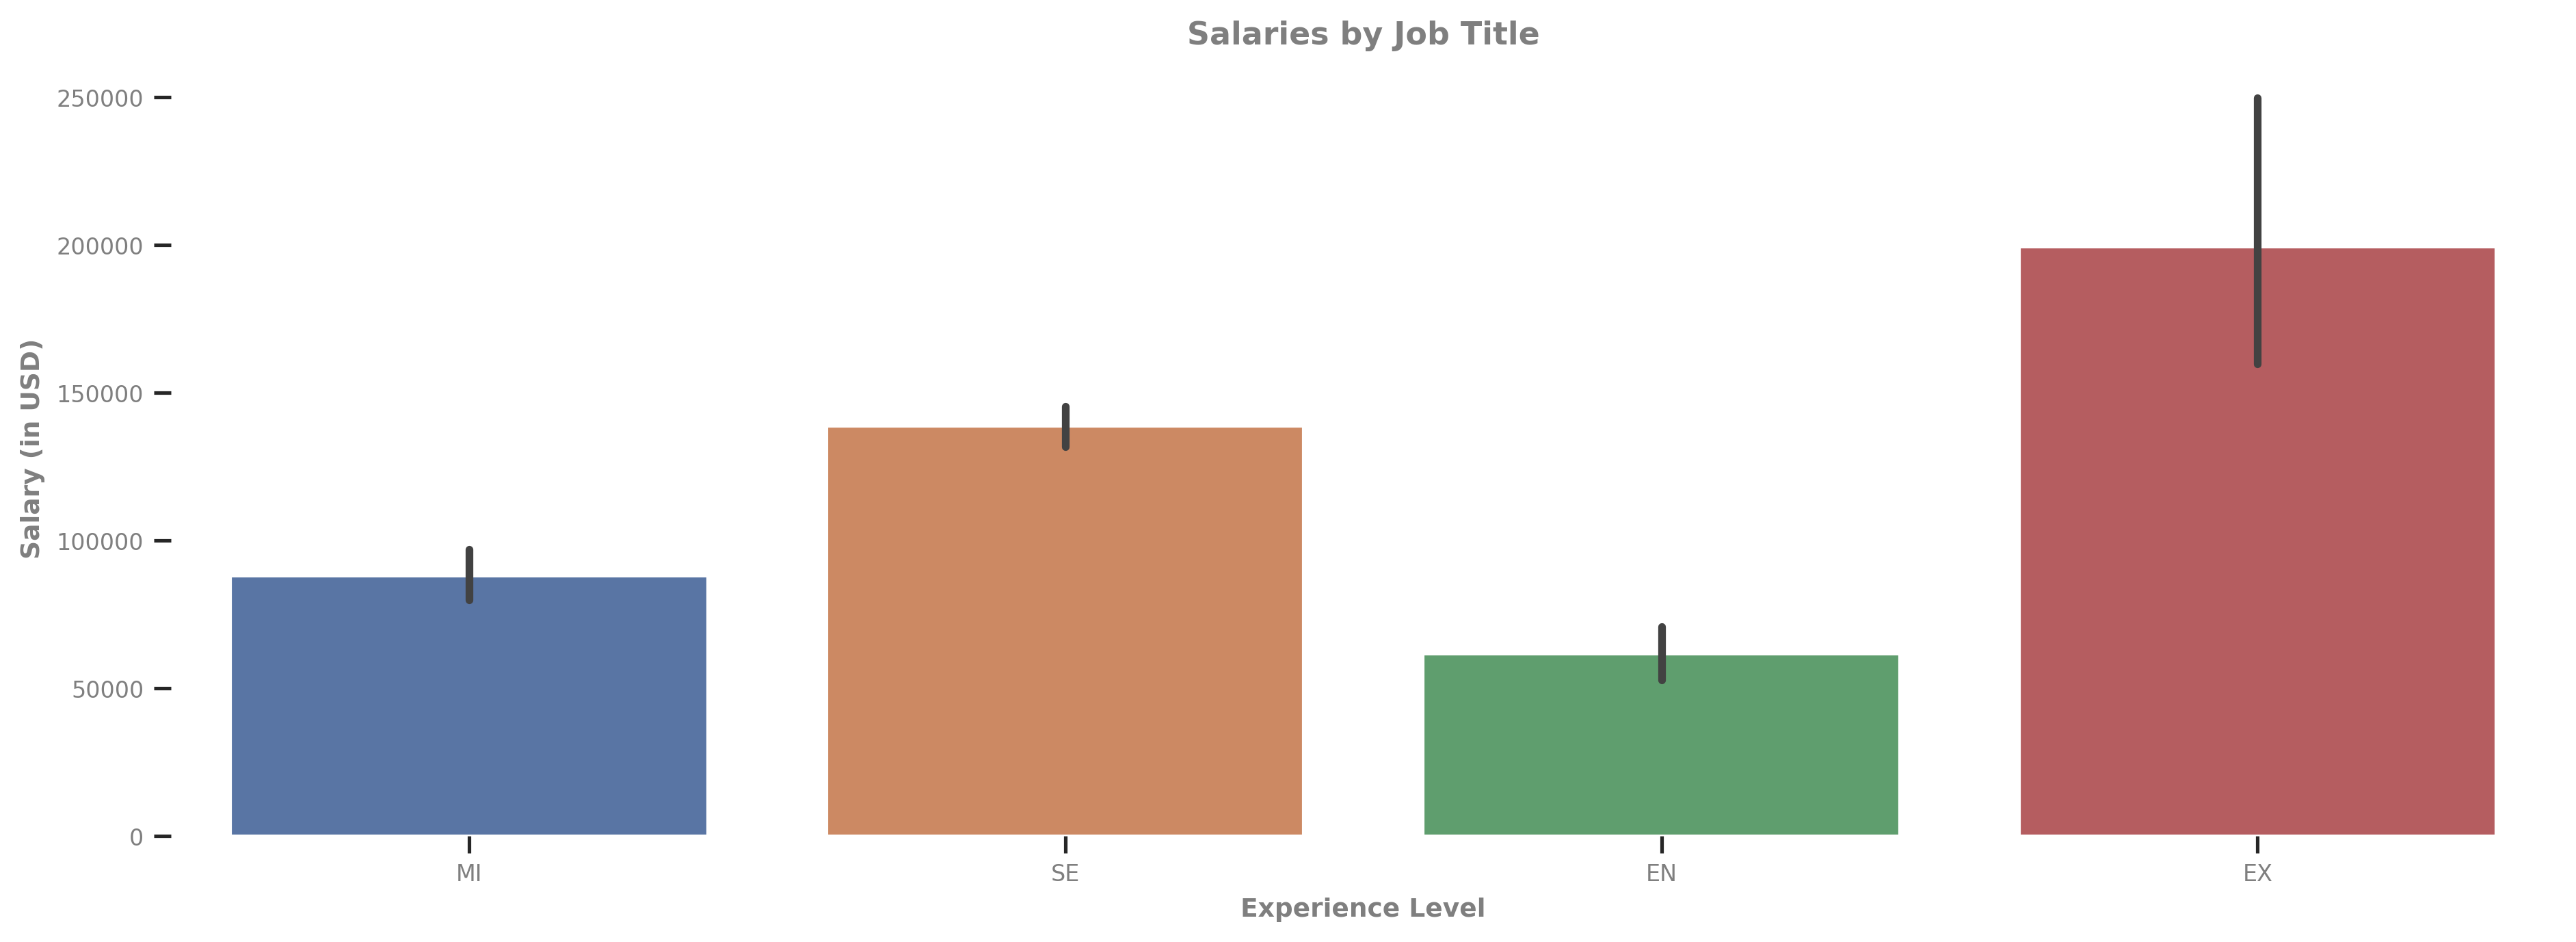

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="experience_level", y="salary")
plt.ylabel(ylabel="Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.xlabel(xlabel="Experience Level", size=9, fontdict=FIG_FONT)
plt.title(label="Salaries by Job Title", size= 11, fontdict=FIG_FONT)
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.xticks(fontname="Helvetiva, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.2.2 Analysis of Employment Type

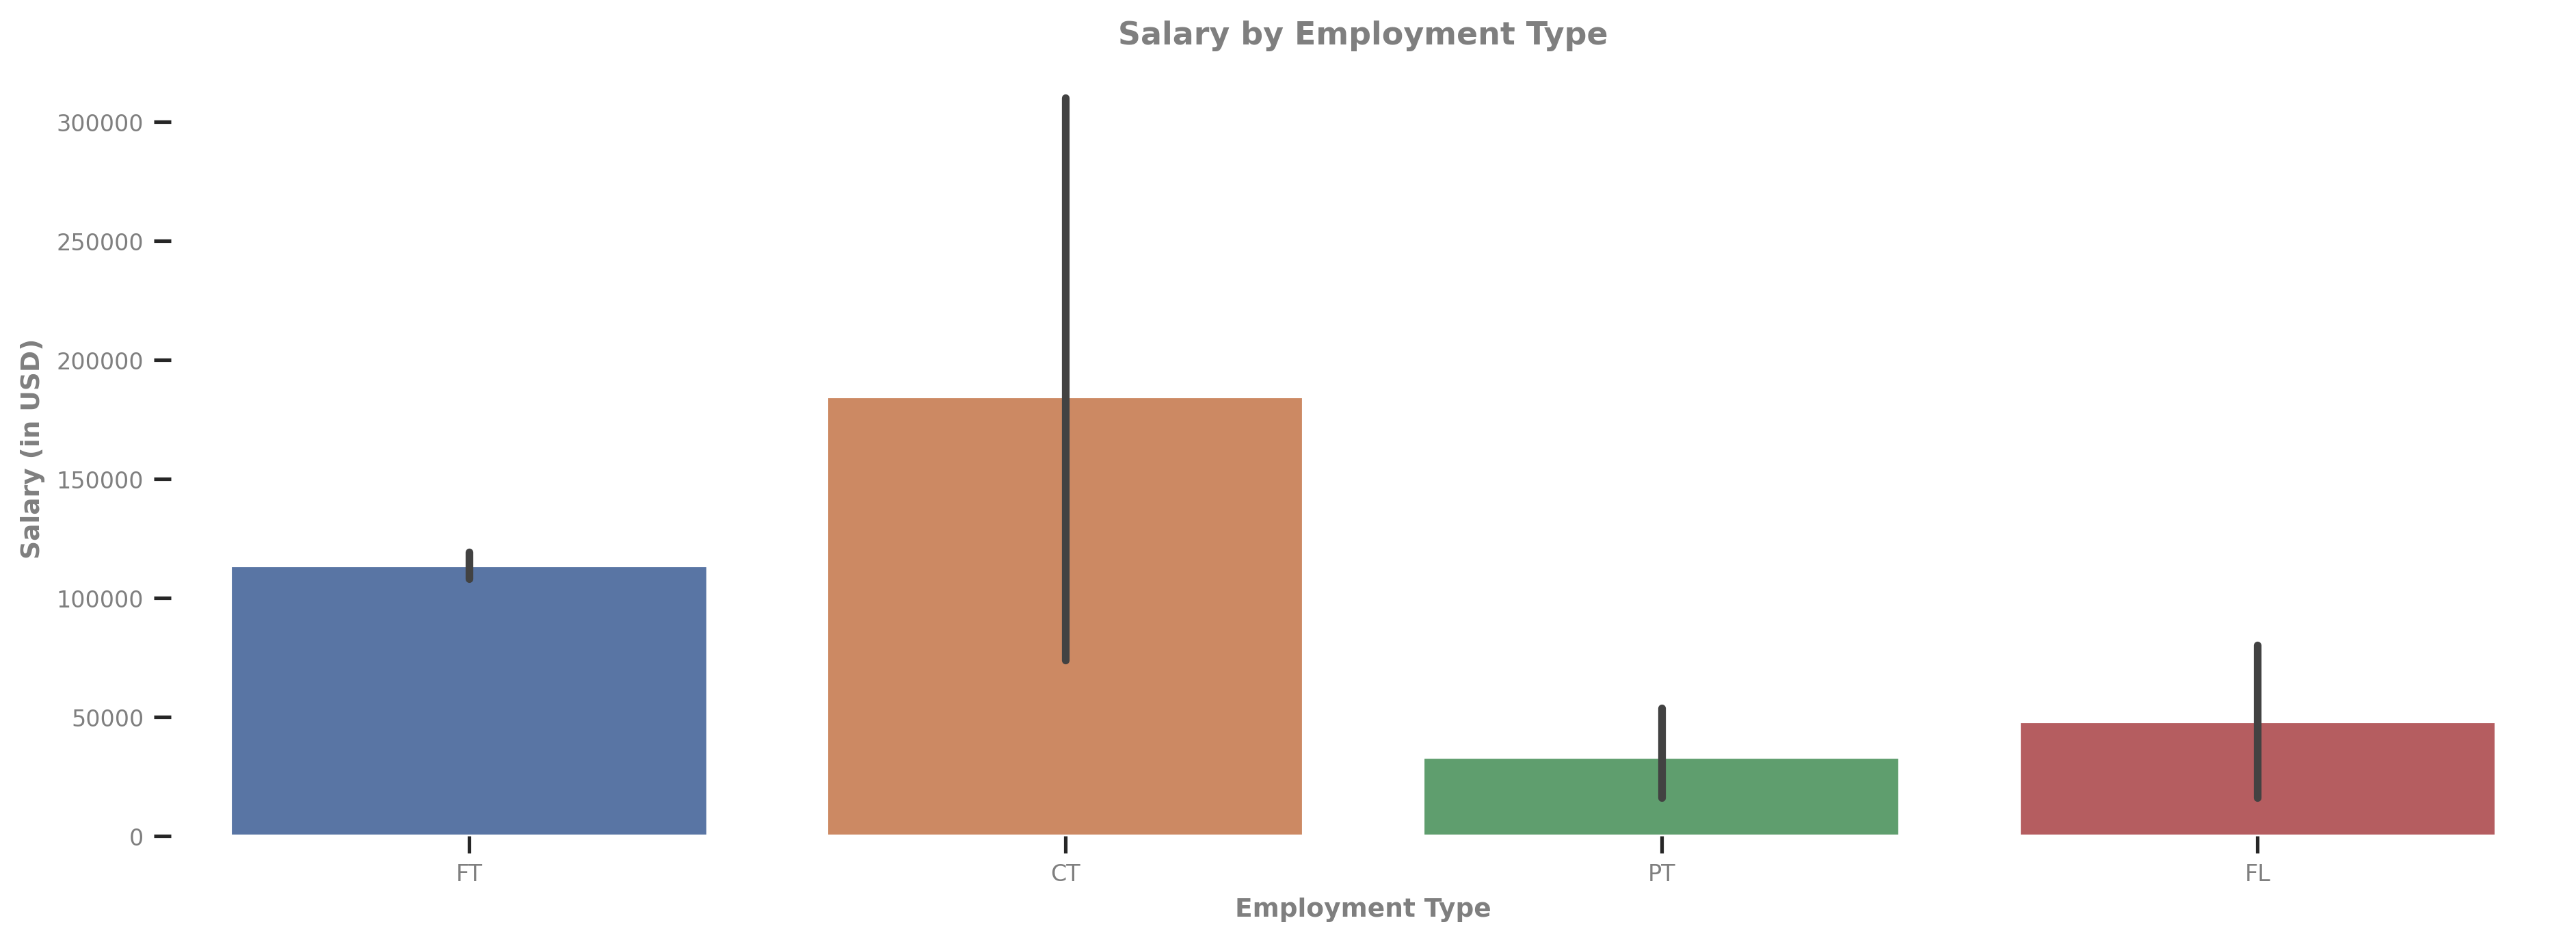

In [19]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="employment_type", y="salary")
plt.xlabel(xlabel="Employment Type", size=9, fontdict=FIG_FONT)
plt.ylabel(ylabel="Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title(label="Salary by Employment Type", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetiva, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetiva, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.2.3 Analysis of Remote Ratio

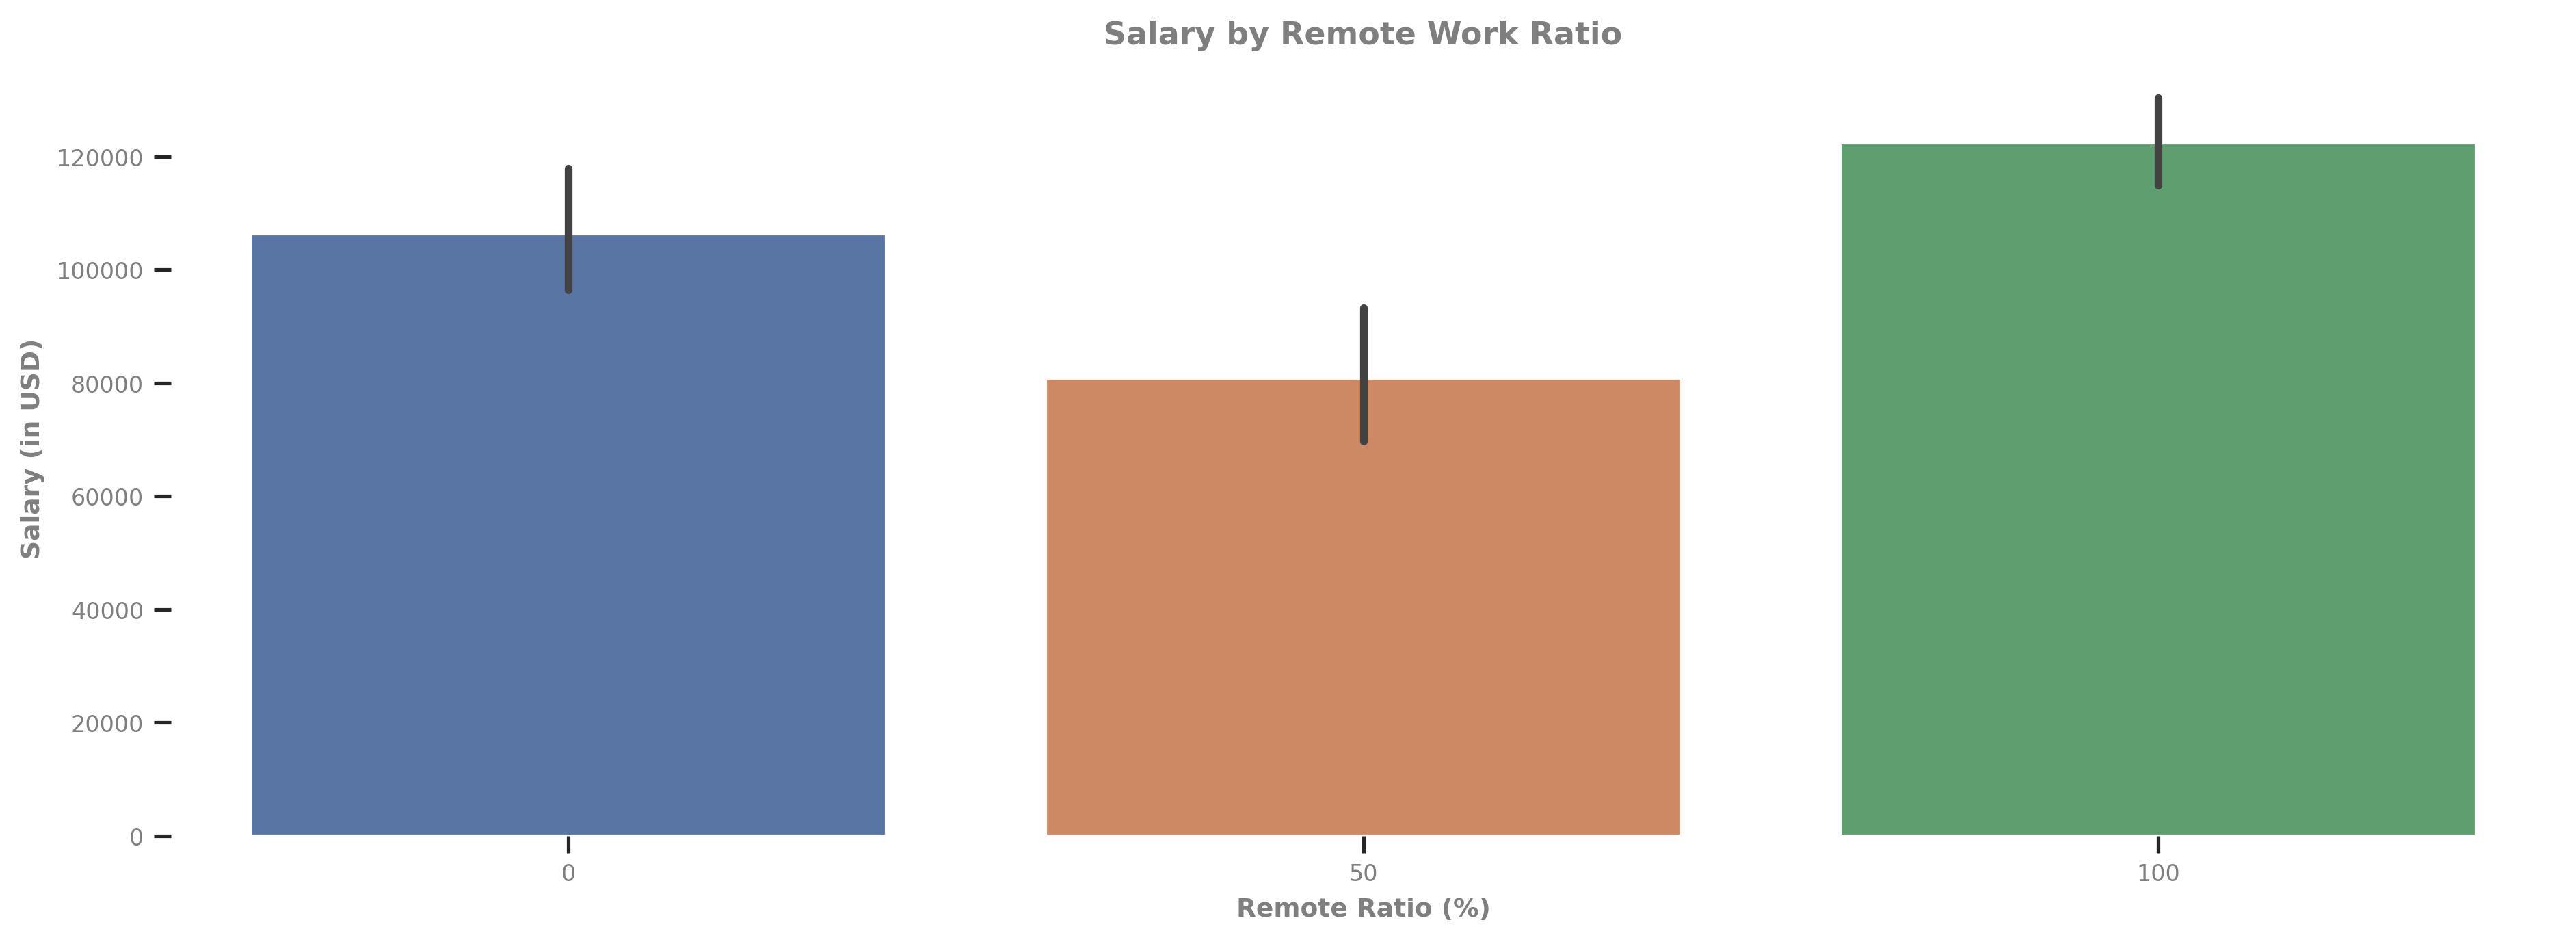

In [20]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="remote_ratio", y="salary")
plt.xlabel("Remote Ratio (%)", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Remote Work Ratio", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.2.4 Analysis of Company Size

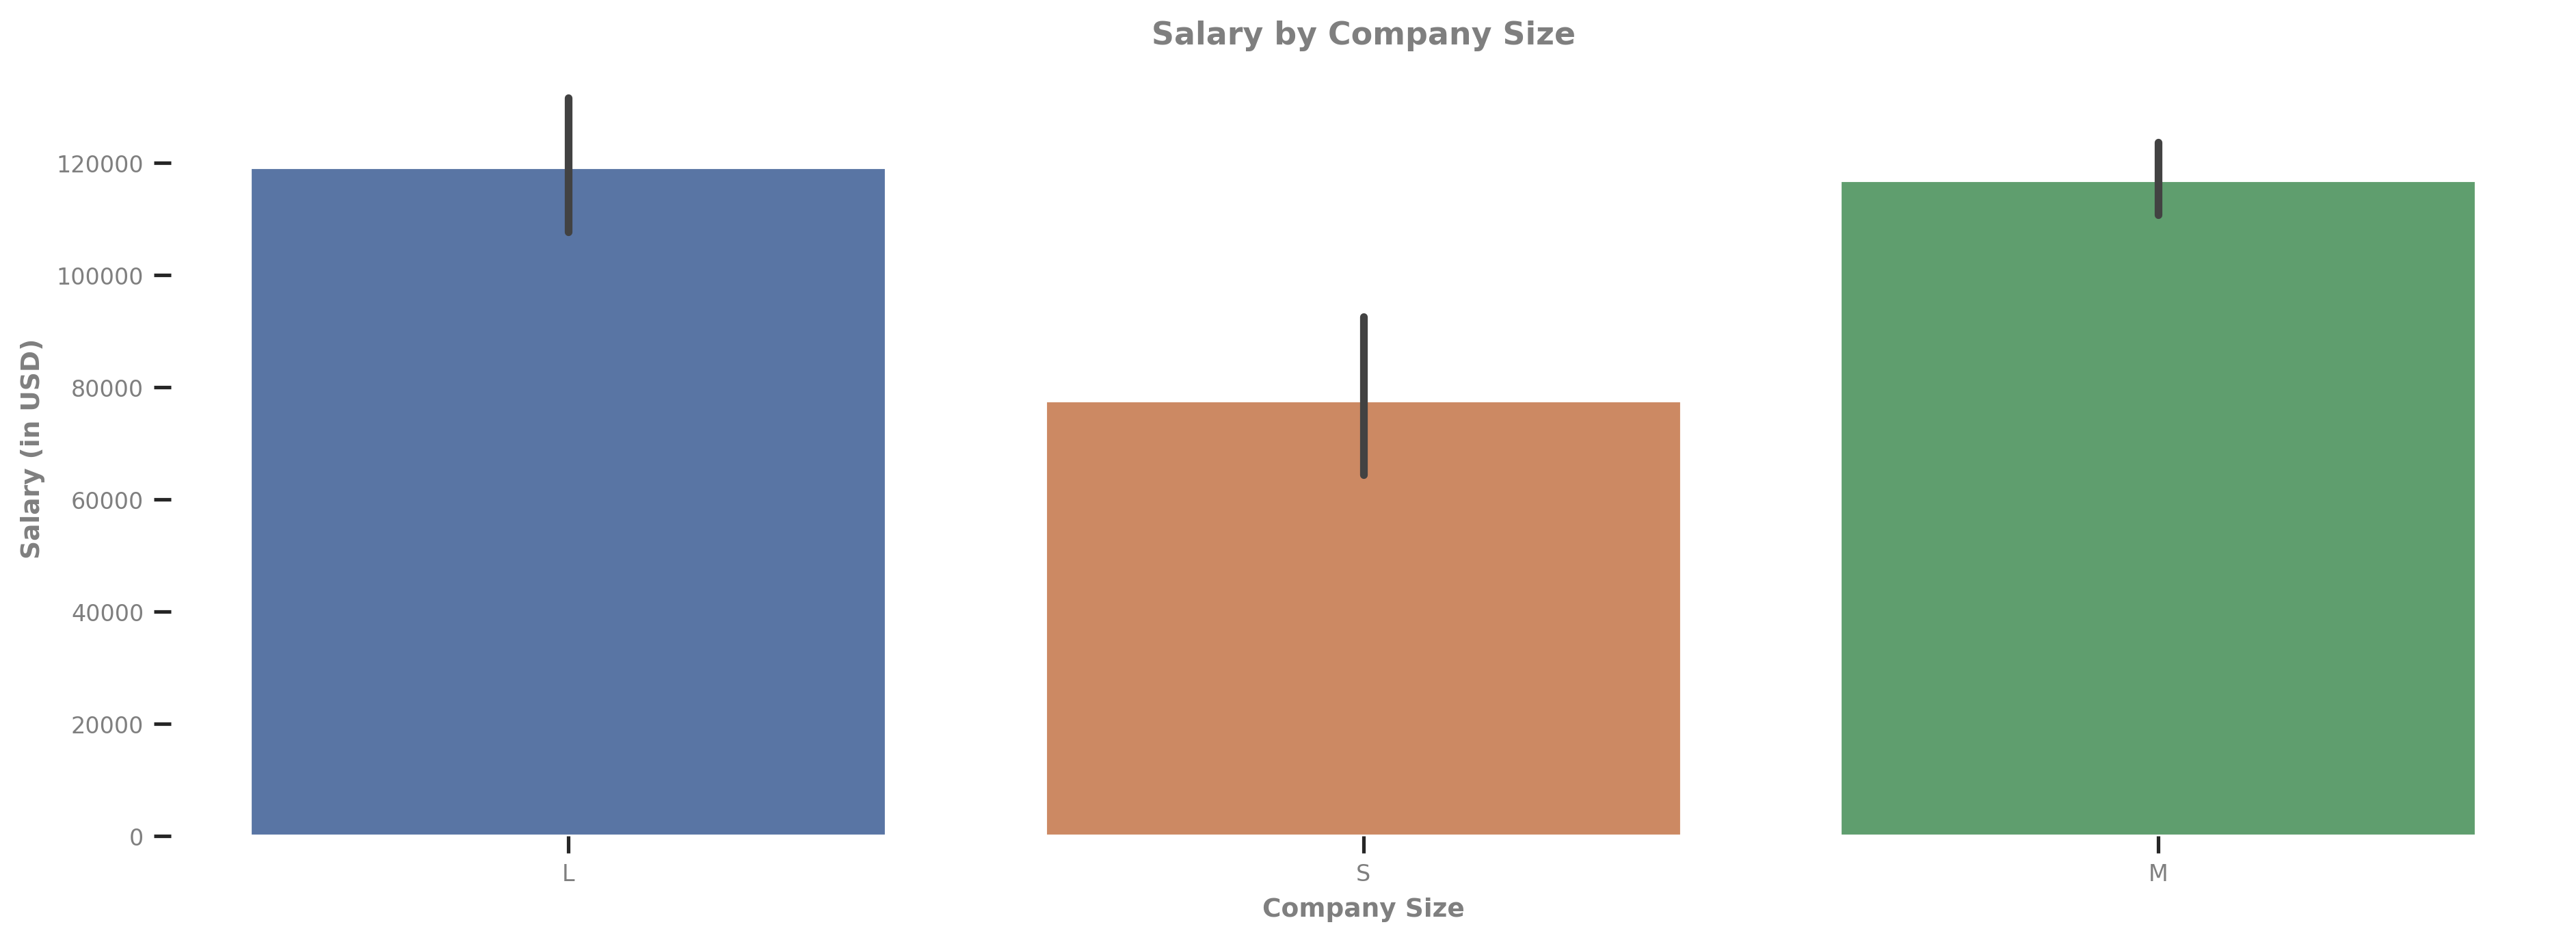

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="company_size", y="salary")
plt.xlabel("Company Size", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Company Size", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.2.5 Analysis of Company Location

In [22]:
salary_counts = pd.DataFrame(salaries.groupby("company_location").agg({"count"}).iloc[:, 0])
salary_counts.columns = ["count"]
common_countries = salary_counts[salary_counts["count"] > 1]
salaries_in_common_countries = salaries[salaries["company_location"].isin(common_countries.index)]

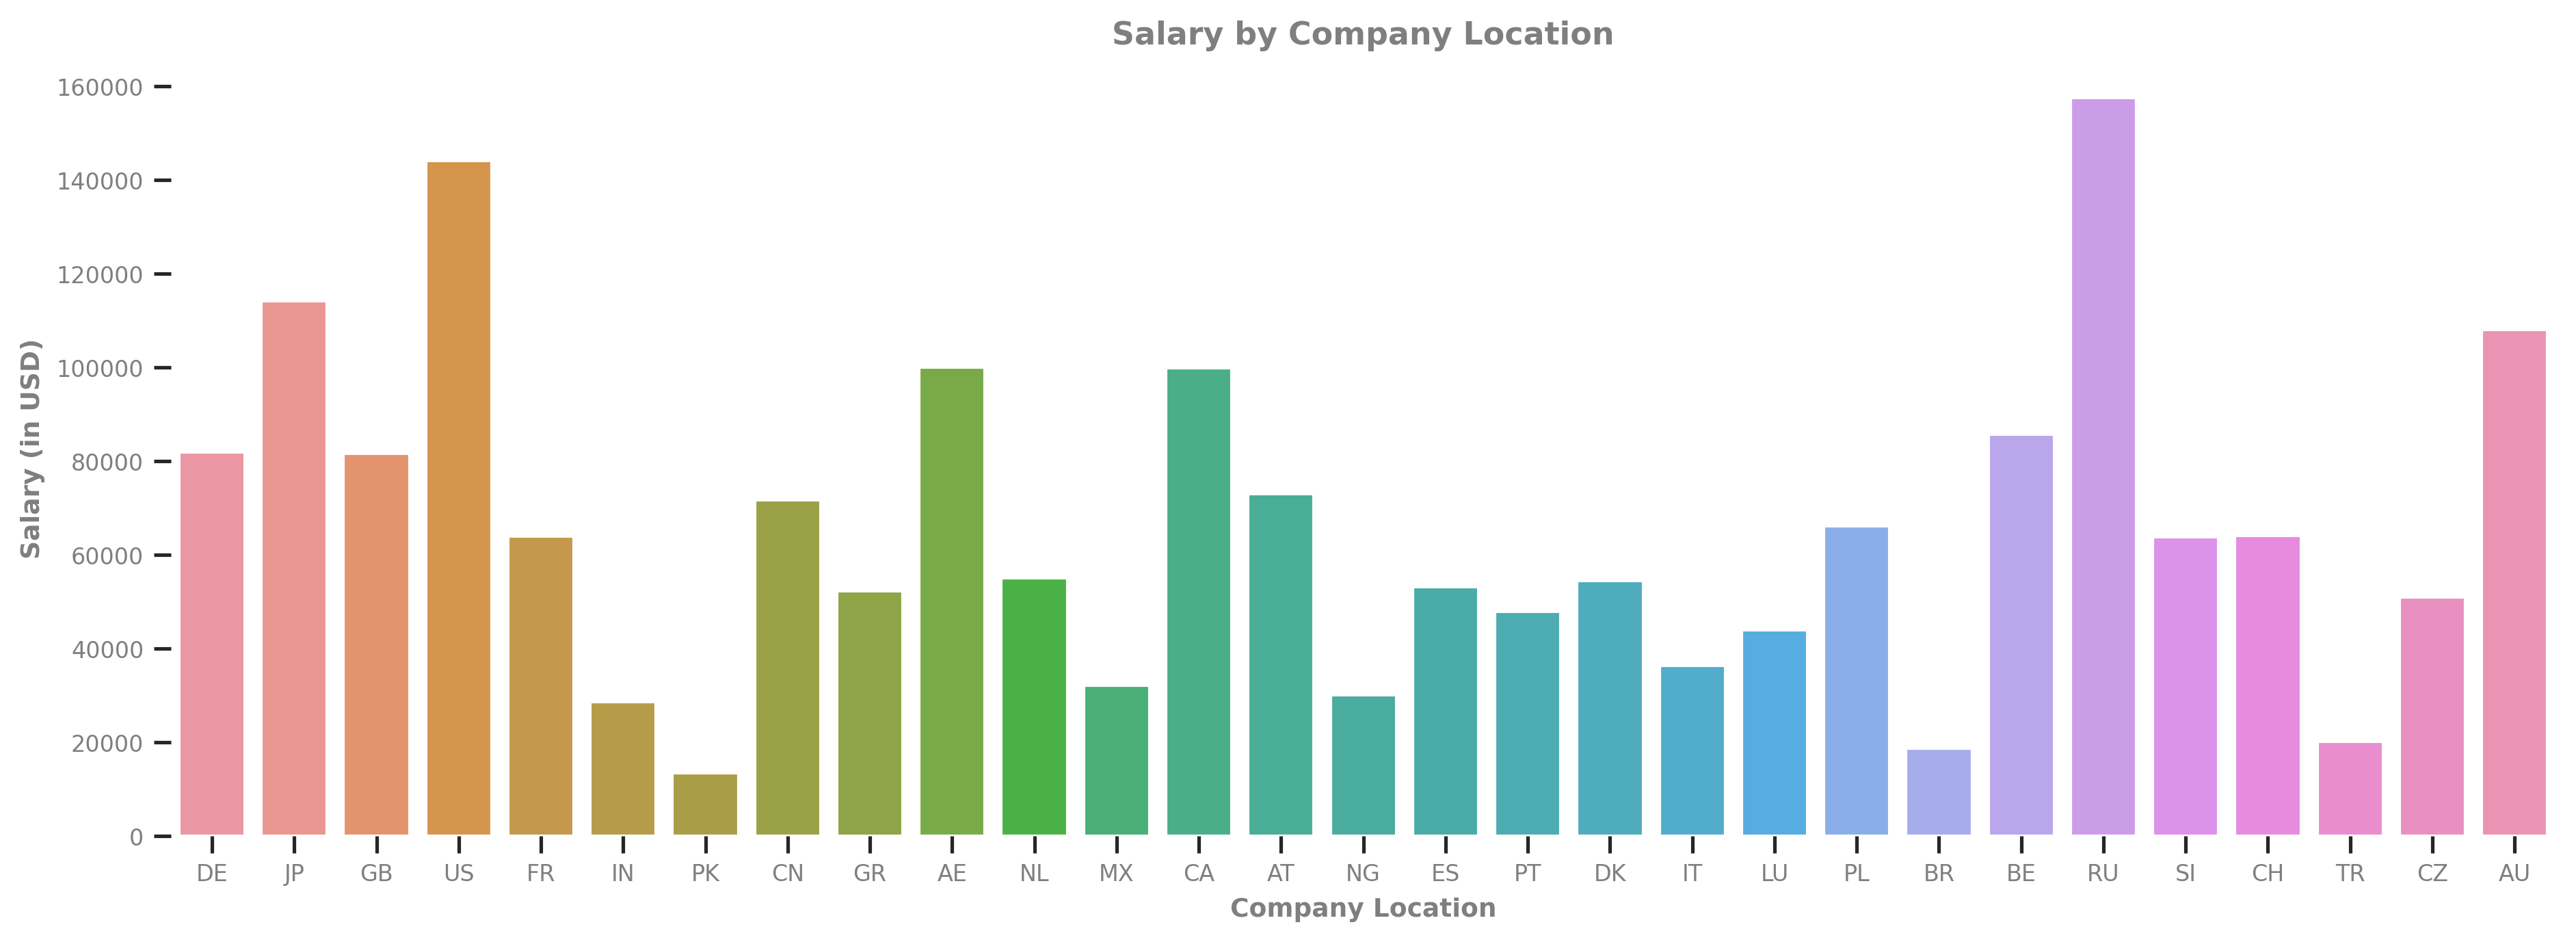

In [23]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries_in_common_countries, x="company_location", y="salary", ci=None)
plt.xlabel("Company Location", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Company Location", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.2.6 Analysis of Work Year

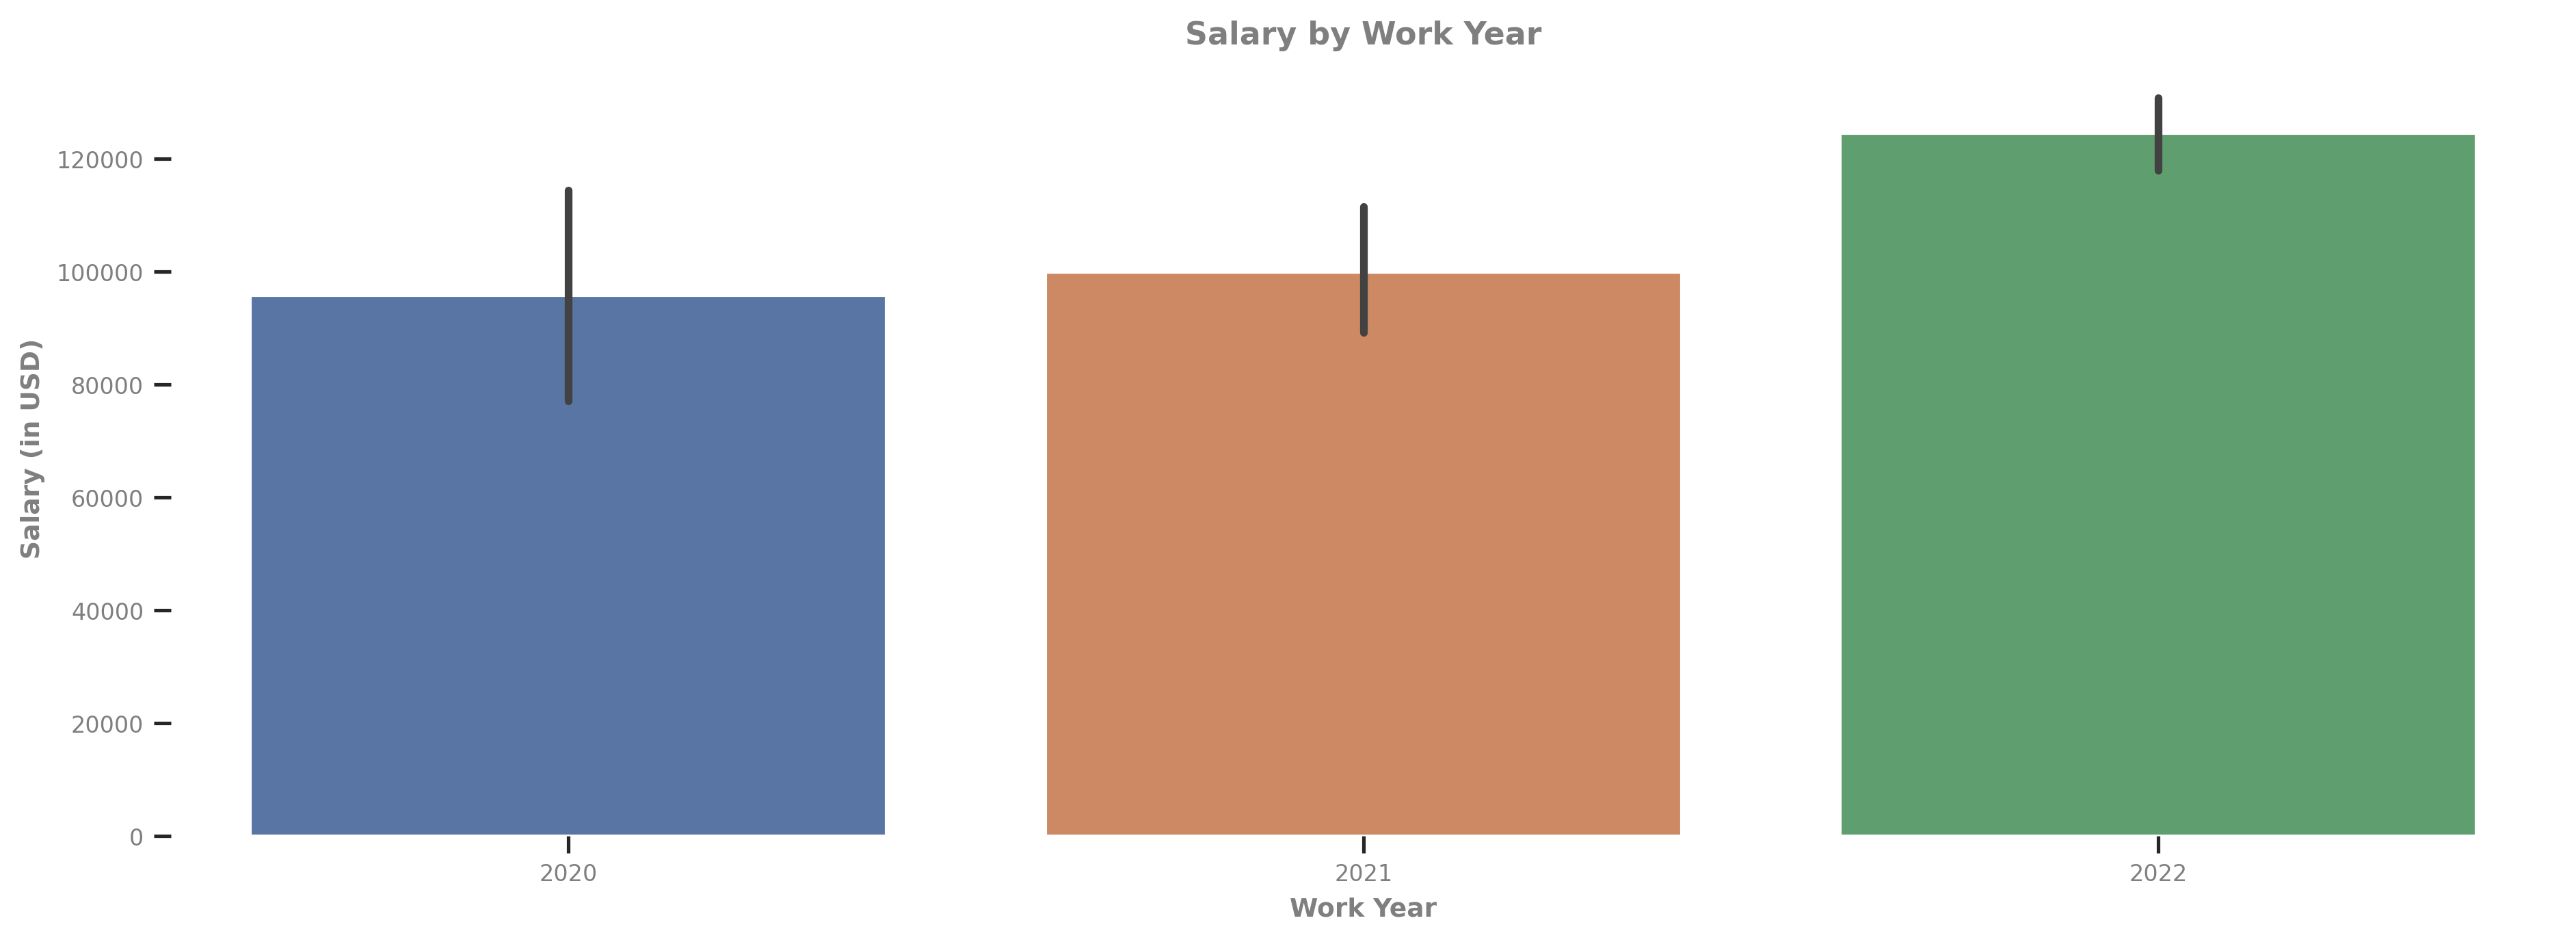

In [24]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="work_year", y="salary")
plt.xlabel("Work Year", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Work Year", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.2.7 Analysis of Employee Residence

In [25]:
salary_counts = pd.DataFrame(salaries.groupby("employee_residence").agg({"count"}).iloc[:, 0])
salary_counts.columns = ["count"]
common_countries = salary_counts[salary_counts["count"] > 1]
salaries_in_common_countries = salaries[salaries["employee_residence"].isin(common_countries.index)]

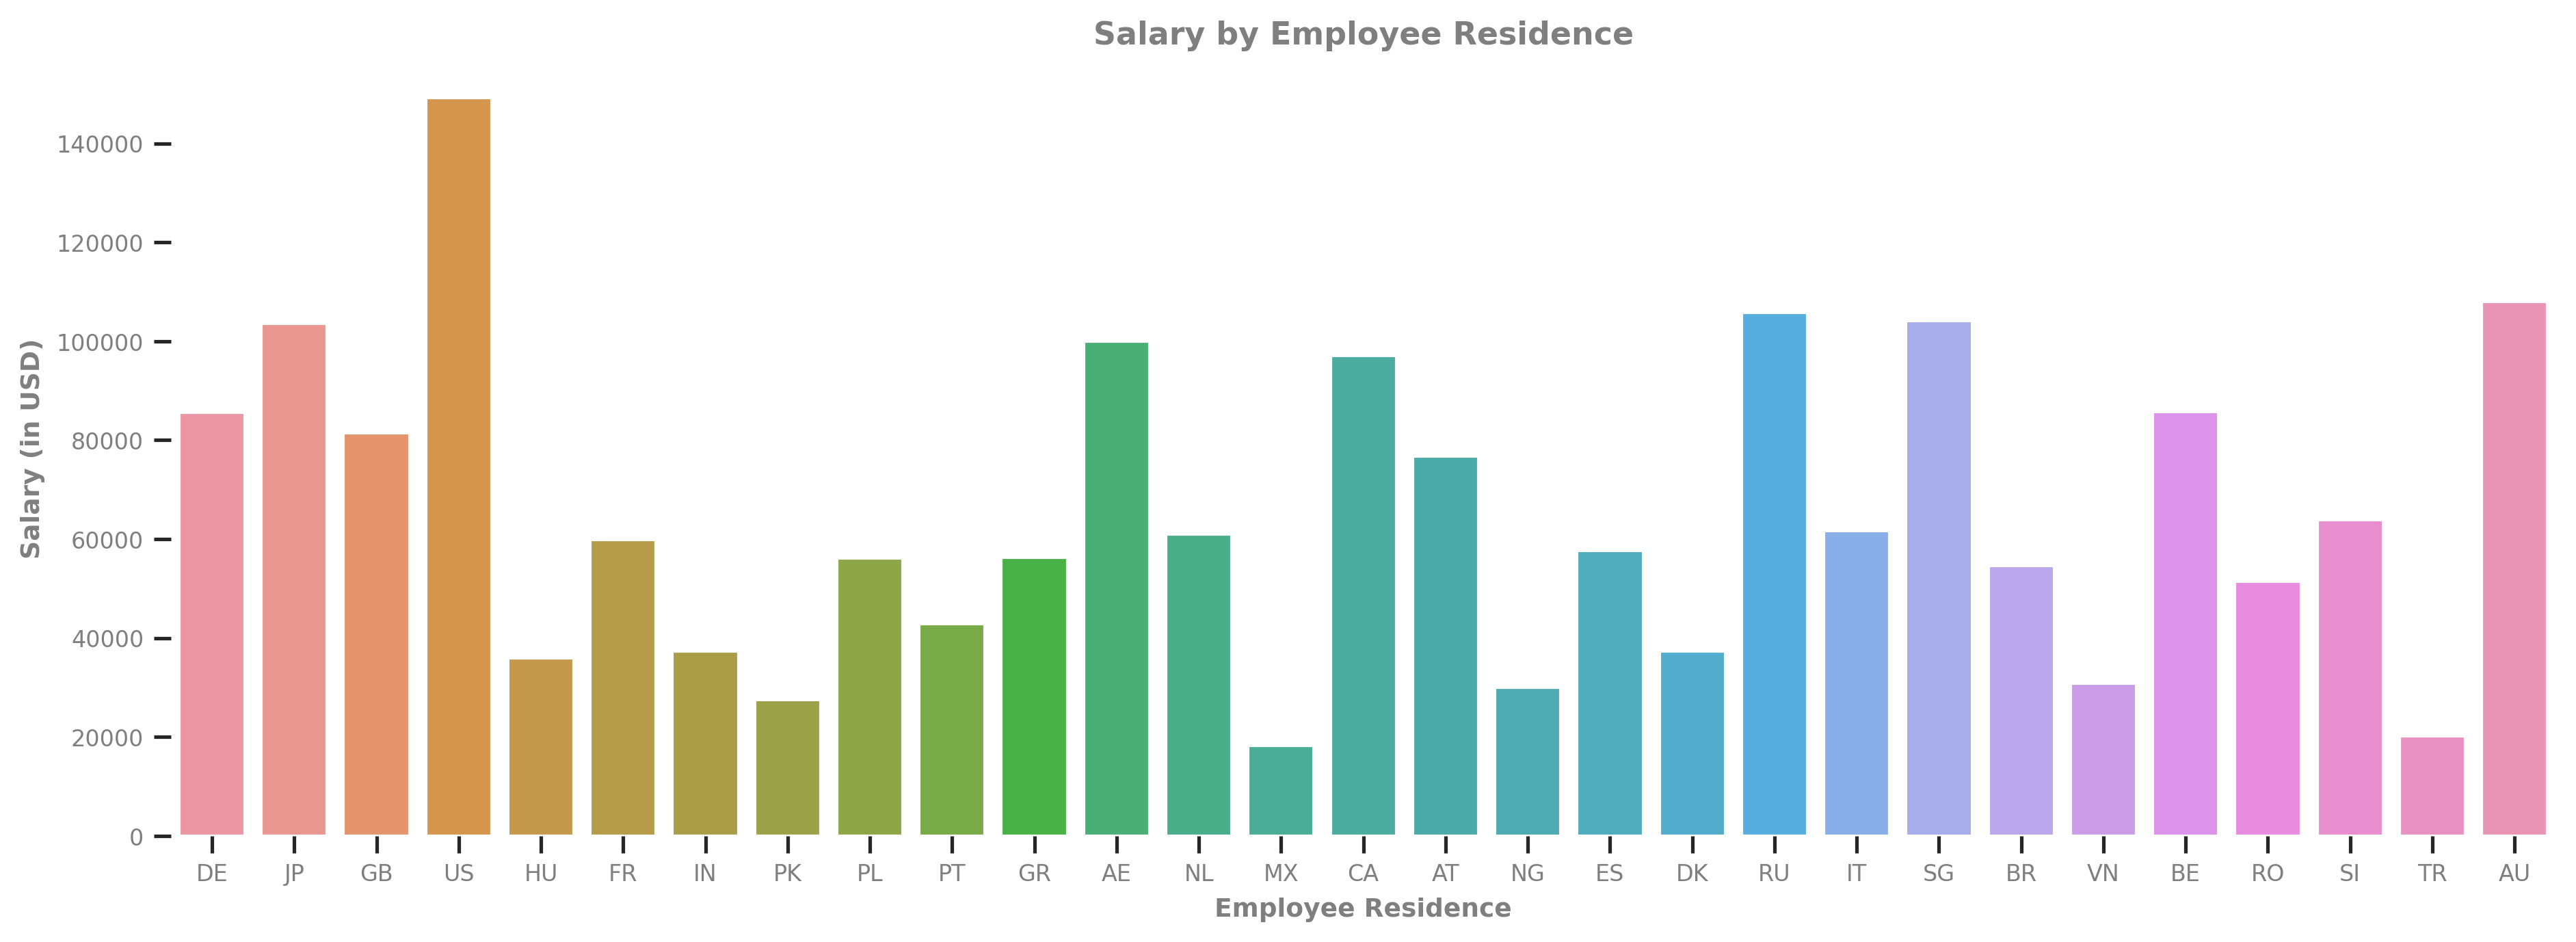

In [26]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries_in_common_countries, x="employee_residence", y="salary", ci=None)
plt.xlabel("Employee Residence", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Employee Residence", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()

#### 5.2.8 Analysis of Job Title

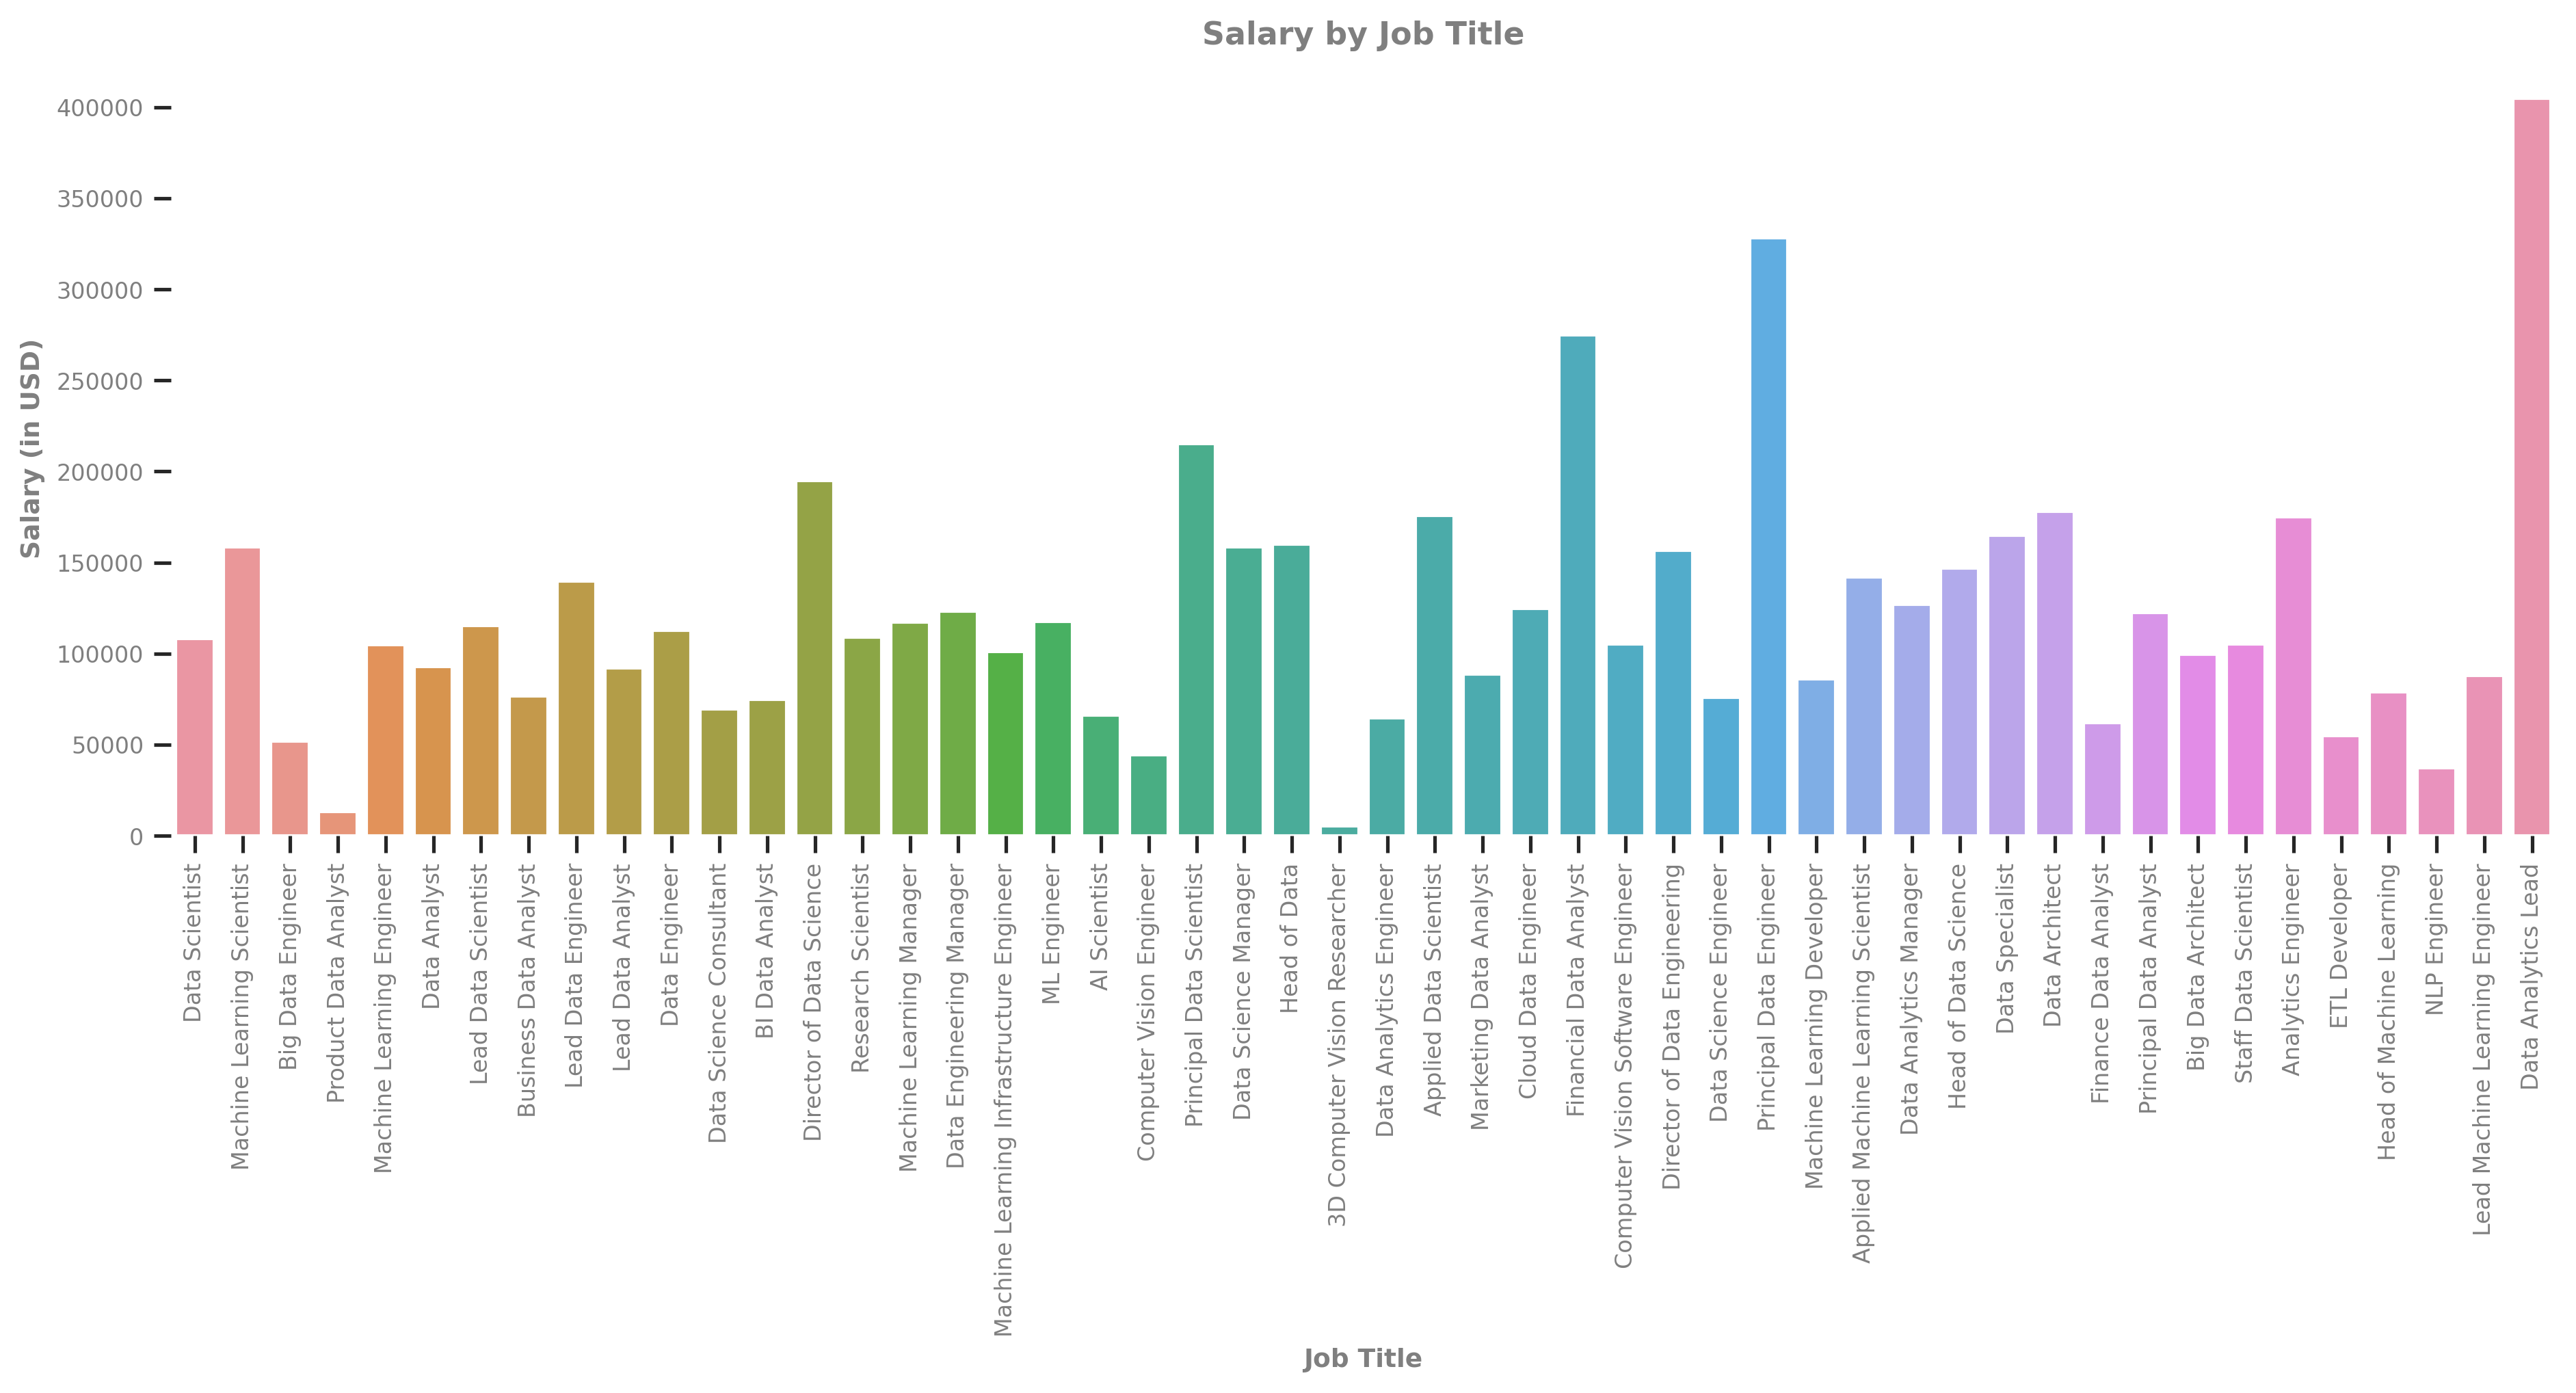

In [27]:
plt.figure(figsize=(15, 5))
sns.barplot(data=salaries, x="job_title", y="salary", ci=None)
plt.xlabel("Job Title", size=9, fontdict=FIG_FONT)
plt.ylabel("Salary (in USD)", size=9, fontdict=FIG_FONT)
plt.title("Salary by Job Title", size=11, fontdict=FIG_FONT)
plt.xticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f", rotation=90)
plt.yticks(fontname="Helvetica, Ariel", size=8, color="#7f7f7f")
sns.despine(bottom=True, left=True)
plt.show()